##### CSCI 303
# Introduction to Data Science
<p/>
### 5 - Data Visualization

<br>

## What is a data visualization?

> A visualization is any kind of visual representation of information designed to enable communication, analysis, discovery, exploration, etc.

> A data visualization is a display of data designed to enable analysis, exploration, and discovery.


Cairo, Alberto (2016-02-08). The Truthful Art: Data, Charts, and Maps for Communication

## Why we use data visualizations

* Data exploration
* Telling a story

## Importance of data visualizations

Aren't descriptive statistics enough?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.random.seed(0)

from IPython.display import HTML

plt.style.use('ggplot')

# http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
one_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
one_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
two_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
two_y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
three_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
three_y = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
four_x = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
four_y = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

xs = [one_x, two_x, three_x, four_x]
ys = [one_y, two_y, three_y, four_y]

In [3]:
for index,x in enumerate(xs):
    print("The mean of series {}'s x values is {}.".format(index+1, np.mean(x)))

The mean of series 1's x values is 9.0.
The mean of series 2's x values is 9.0.
The mean of series 3's x values is 9.0.
The mean of series 4's x values is 9.0.


In [4]:
for index,y in enumerate(ys):
    print("The mean of series {}'s y values is {}.".format(index+1, np.mean(y)))

The mean of series 1's y values is 7.500909090909093.
The mean of series 2's y values is 7.50090909090909.
The mean of series 3's y values is 7.5.
The mean of series 4's y values is 7.500909090909091.


In [5]:
for index,x in enumerate(xs):
    print("The variance of series {}'s x values is {}.".format(index+1, np.var(x)))

The variance of series 1's x values is 10.0.
The variance of series 2's x values is 10.0.
The variance of series 3's x values is 10.0.
The variance of series 4's x values is 10.0.


In [6]:
for index,y in enumerate(ys):
    print("The variance of series {}'s y values is {}.".format(index+1, np.var(y)))

The variance of series 1's y values is 3.7520628099173554.
The variance of series 2's y values is 3.752390082644628.
The variance of series 3's y values is 3.747836363636364.
The variance of series 4's y values is 3.7484082644628103.


In [7]:
for i in range(4):
    print("The corellation between x's and y's for series {} is {}".format(i+1, np.corrcoef(xs[i], ys[i])[0][1]))

The corellation between x's and y's for series 1 is 0.81642051634484
The corellation between x's and y's for series 2 is 0.8162365060002428
The corellation between x's and y's for series 3 is 0.8162867394895982
The corellation between x's and y's for series 4 is 0.8165214368885031


In [8]:
for i in range(4):
    aqcoefs = np.polyfit(xs[0], ys[0], 1)
    print("The fitted line for series {} is y = {}x + {}".format(i+1, aqcoefs[0], aqcoefs[1]))

The fitted line for series 1 is y = 0.5000909090909096x + 3.000090909090909
The fitted line for series 2 is y = 0.5000909090909096x + 3.000090909090909
The fitted line for series 3 is y = 0.5000909090909096x + 3.000090909090909
The fitted line for series 4 is y = 0.5000909090909096x + 3.000090909090909


In [9]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

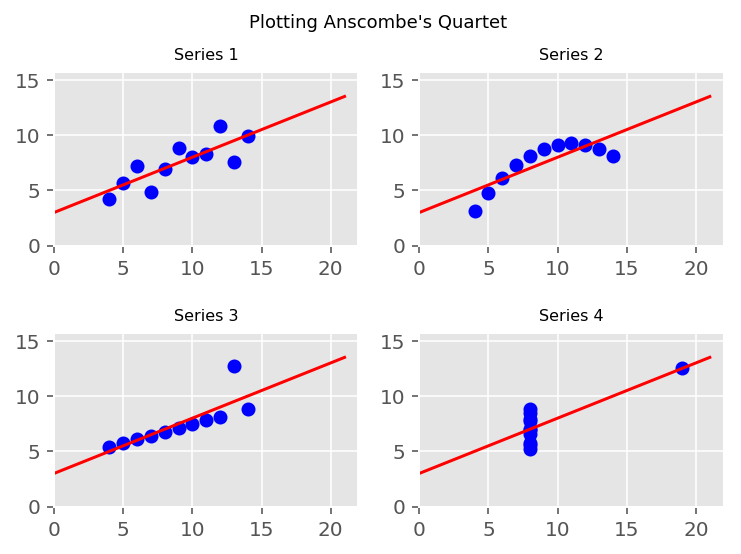

In [10]:
buffer = 3
maxX = max(max(xs[0]),max(xs[1]),max(xs[2]),max(xs[3]))
maxY = max(max(ys[0]),max(ys[1]),max(ys[2]),max(ys[3]))

x = np.arange(0,maxX+buffer)
fx = aqcoefs[0]* x + aqcoefs[1]

fig, pltAxes = plt.subplots(ncols=2, nrows=2)
axes = pltAxes.ravel()

for i, ax in enumerate(axes):
    ax.plot(xs[i],ys[i],"bo")              # Plot the x and y values
    ax.set_ylim(0, maxY + buffer)          # Use the same scale
    ax.set_xlim(0, maxX + buffer)
    ax.plot(x,fx,"r-")                      # Plot the line
    ax.set_title("Series {}".format(i+1), fontsize=8)   # Add the title for the dataset

fig.suptitle("Plotting Anscombe's Quartet", fontsize=9)
fig.subplots_adjust(hspace=.5)

plt.show()

## Visual Encoding

How accurately our brains understand visualizations from making accurate estimates to making general estimates:

1. Points on a scale (most accurate)
1. Length
1. Direction / Angle
1. Area
1. Volume
1. Shading and saturation
1. Color and hue (most general)

## Commonly Used Graphs & When To Use Them
### Scatter Plots

Use when you are trying to show the relationship between 2 variables.

In [11]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

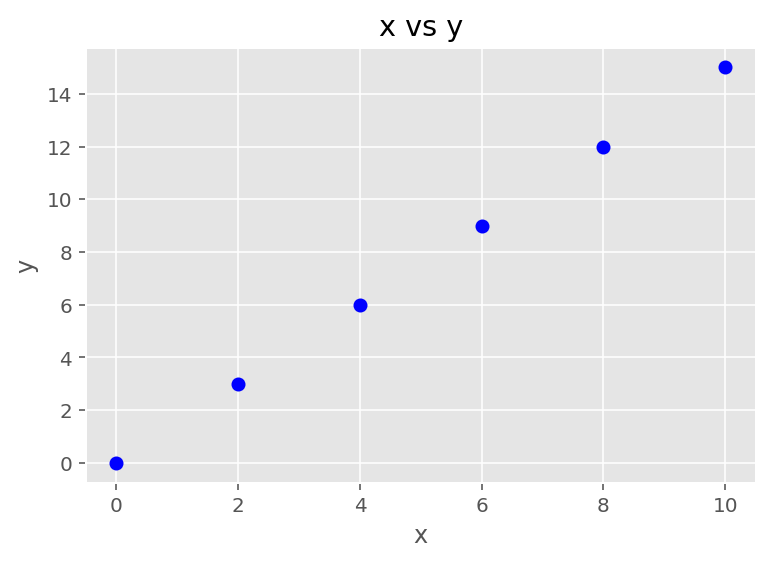

In [12]:
x = range(0,11,2)
y = range(0,17,3)
plt.plot(x,y, "bo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()

## Scatter Plots

It's sometimes useful to also add a best fit line.

In [13]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

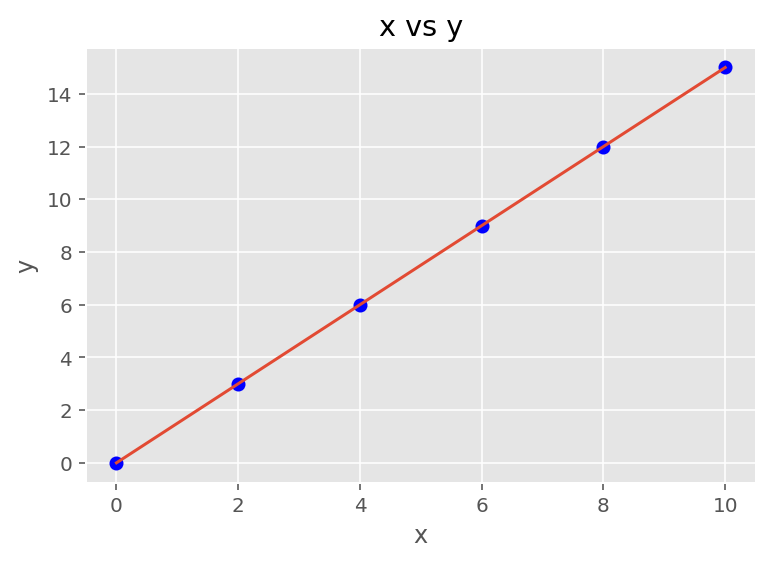

In [14]:
coefs = np.polyfit(x,y,1) 
line = np.array(x) * coefs[0] + coefs[1]

plt.plot(x,y,"bo")
plt.plot(x, line)
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()

## Scatter Plots

It's sometimes useful to instead add an average line.

In [15]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

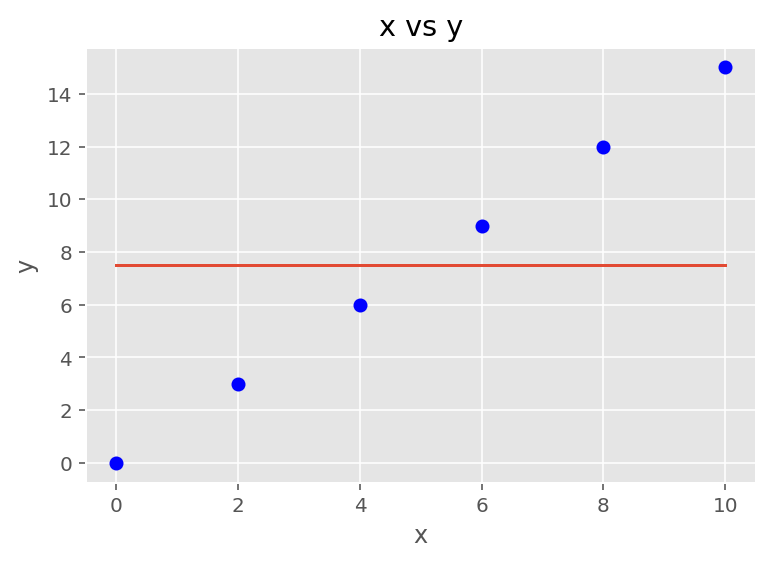

In [16]:
line = [np.mean(y)] * len(x)

plt.plot(x,y,"bo")
plt.plot(x, line)
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()

## Scatter Plots

You can add another dimension using a color gradient or 3d. You shouldn't. Instead, use a scatter matrix.

In [17]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [18]:
n = 500
appleSales = [np.random.randint(2000,5000) for i in range(n)]
orangeSales = [np.random.randint(2000,5000) for i in range(n)]
avocadoSales = [np.random.randint(2000,5000) for i in range(n)]
cherrySales = [np.random.randint(2000,5000) for i in range(n)]
sales = pd.DataFrame({
    "apples": appleSales, "oranges": orangeSales, "avocados": avocadoSales, "cherries": cherrySales
})
sales

,apples,oranges,avocados,cherries
0,4732,2246,3882,3492
1,4607,4900,2430,4437
2,3653,3159,3437,4426
3,2835,3731,2770,4904
4,2763,4261,2645,4321
5,3731,4150,3401,3988
6,3033,4375,4831,4360
7,2277,2595,4894,4208
8,3778,3247,3443,3265
9,3828,4304,4228,2337


In [19]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

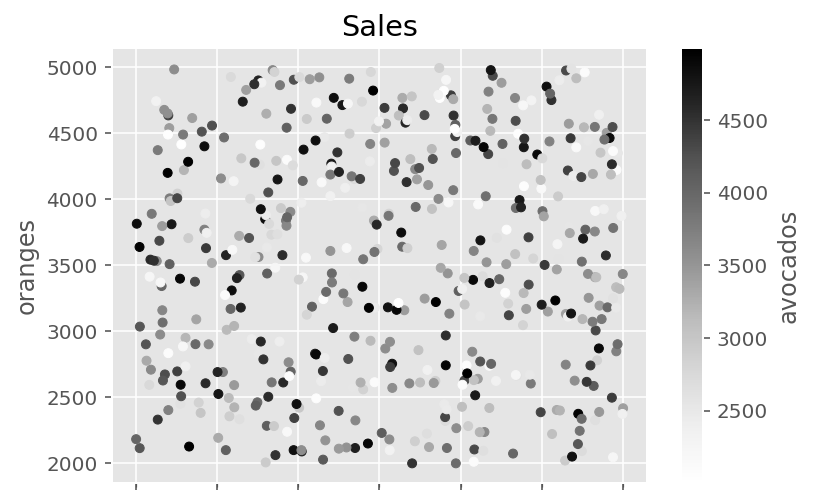

In [20]:
sales.plot(kind="scatter", x="apples", y="oranges", c="avocados")
plt.title("Sales")
plt.show()

In [21]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

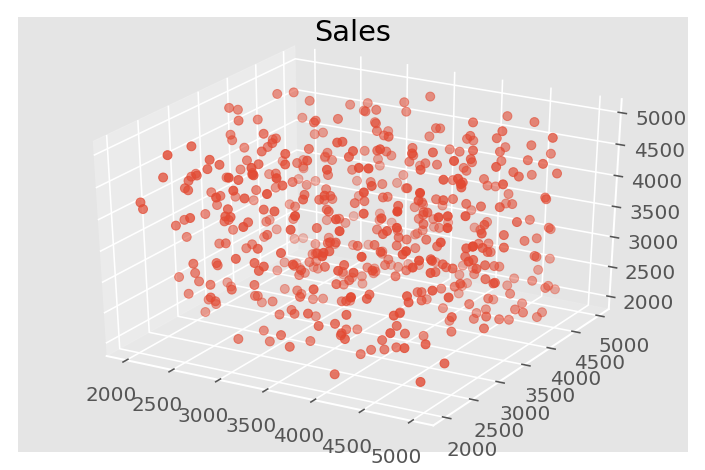

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=sales["apples"], ys=sales["oranges"], zs=sales["avocados"])
plt.title("Sales")
plt.show()

In [23]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


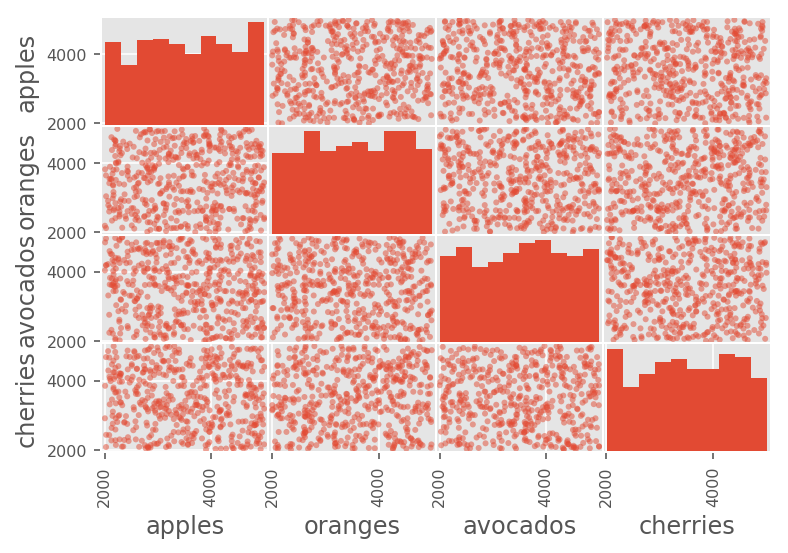

In [24]:
pd.tools.plotting.scatter_matrix(sales)
plt.show()

### Bar Charts

Bar charts are used to compare data.

**Always start the feature scale at 0.**

In [25]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [26]:
locations = ["Denver", "Golden", "Boulder"]
n = len(locations)
appleSales = [np.random.randint(2000,5000) for i in range(n)]
orangeSales = [np.random.randint(2000,5000) for i in range(n)]
avocadoSales = [np.random.randint(2000,5000) for i in range(n)]
cherrySales = [np.random.randint(2000,5000) for i in range(n)]
simpleSales = pd.DataFrame({
    "location": locations, "apples": appleSales, "oranges": orangeSales, "avocados": avocadoSales, "cherries": cherrySales
})

In [27]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

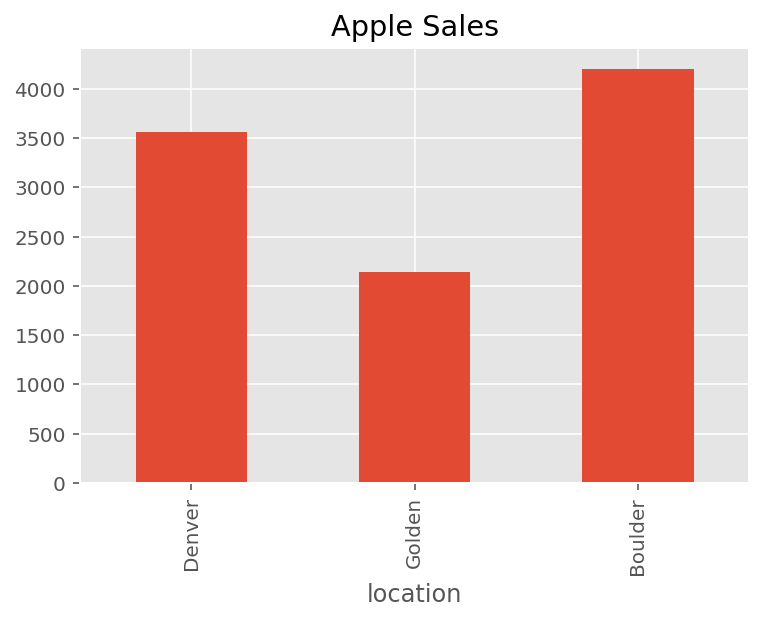

In [28]:
simpleSales[["location", "apples"]].plot(kind="bar", x="location", legend=False)
plt.title("Apple Sales")
plt.show()

In [29]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

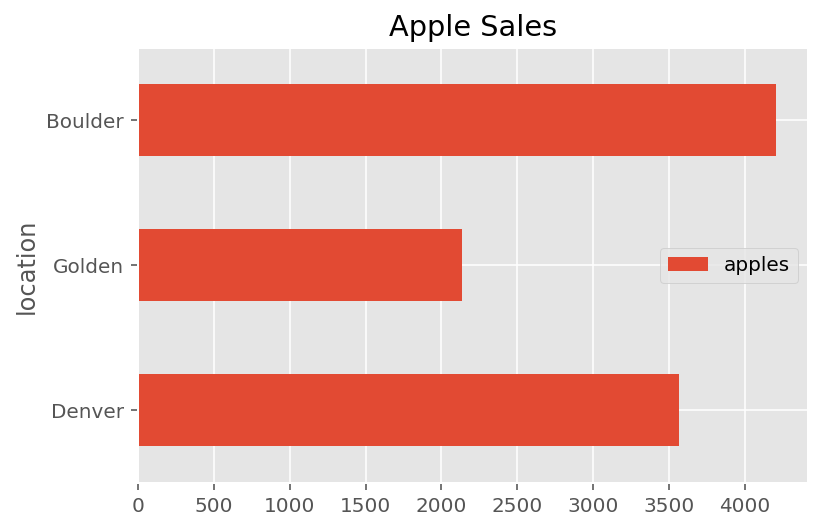

In [30]:
simpleSales[["location", "apples"]].plot(kind="barh", x="location")
plt.title("Apple Sales")
plt.show()

In [31]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

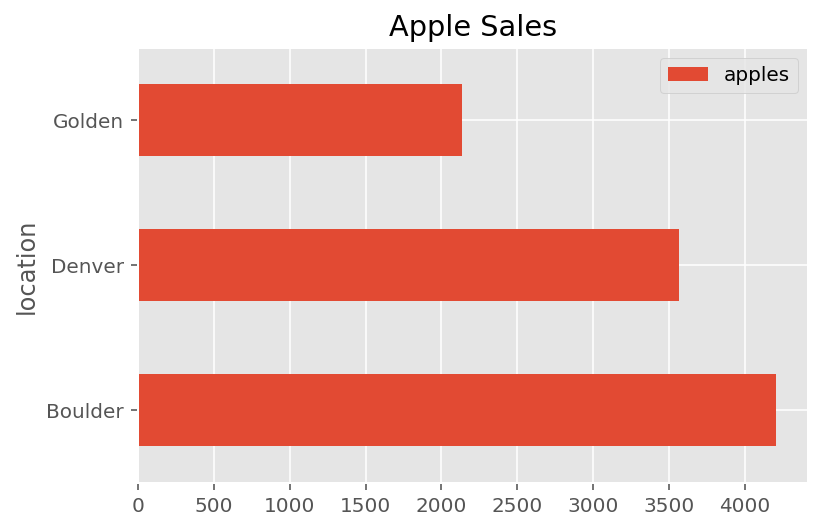

In [32]:
simpleSales.sort_values("apples", ascending=False)[["location", "apples"]].plot(kind="barh", x="location")
plt.title("Apple Sales")
plt.show()

## Bar Charts

To compare multiple series, use side by side bars/columns instead of stacked bar charts. Stacked bar charts make it difficult to compare values since they don't start at the same level.

In [33]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

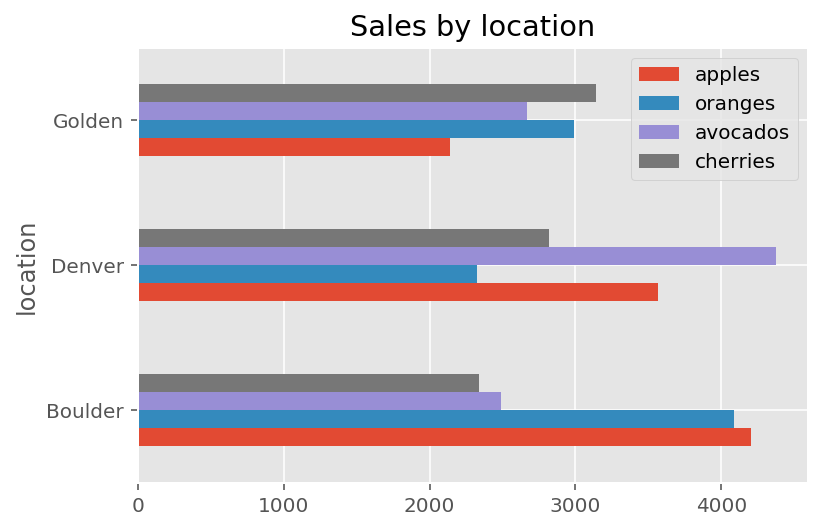

In [34]:
simpleSales.sort_values("apples", ascending=False).plot(kind="barh", x="location")
plt.title("Sales by location")
plt.show()

### Histograms

Use histograms to understand the distribution of a data set.

In [35]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

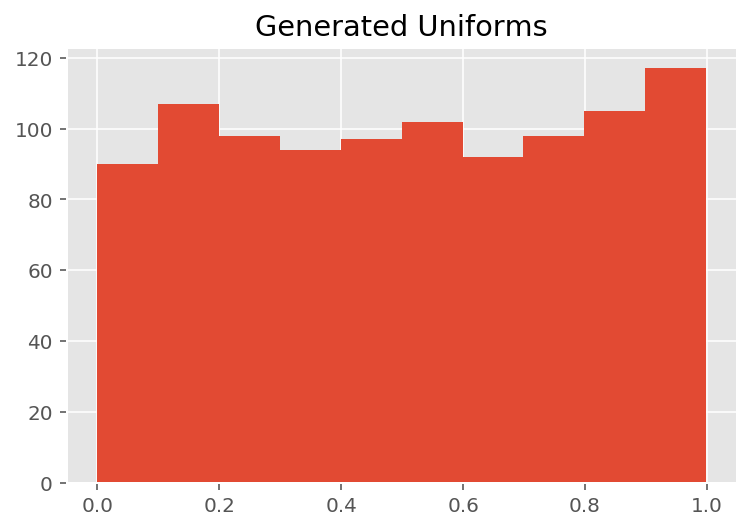

In [36]:
uniforms = [np.random.rand() for i in range(1000)]
plt.hist(uniforms)
plt.title("Generated Uniforms")
plt.show()

In [37]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

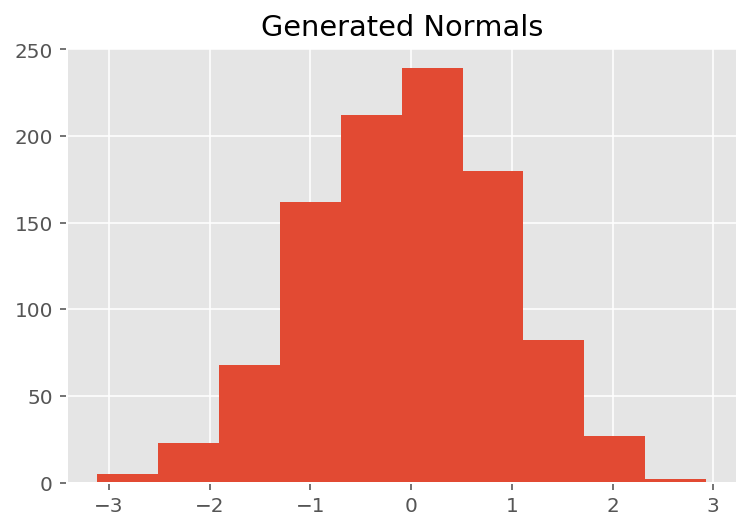

In [38]:
normals = [np.random.normal() for i in range(1000)]
plt.hist(normals)
plt.title("Generated Normals")
plt.show()

In [39]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

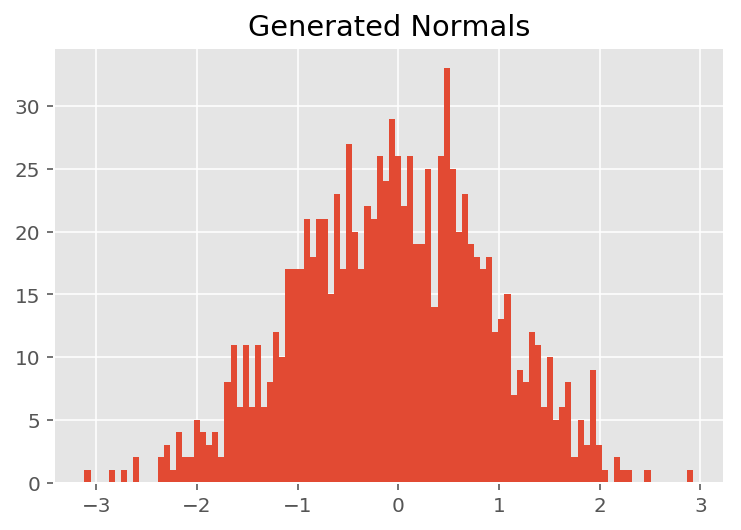

In [40]:
plt.hist(normals,100)
plt.title("Generated Normals")
plt.show()

In [41]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


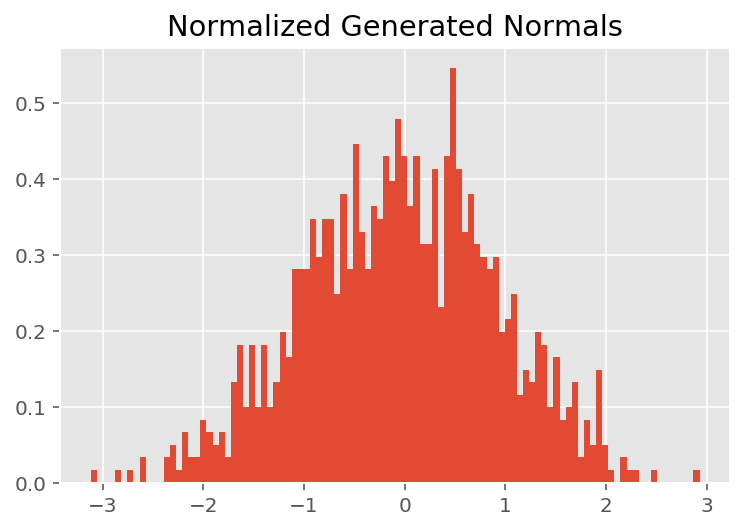

In [42]:
plt.hist(normals,100, normed=1)
plt.title("Normalized Generated Normals")
plt.show()

In [43]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


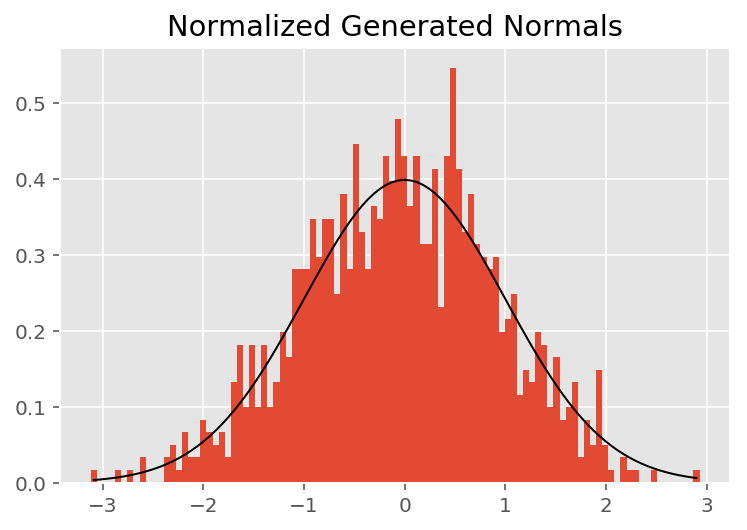

In [44]:
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(normals,100, normed=1)
bincenters = 0.5*(bins[1:]+bins[:-1])
y = mlab.normpdf(bincenters, 0, 1)
plt.plot(bincenters, y, 'k-', linewidth=1)
plt.title("Normalized Generated Normals")
plt.show()

### Probability Plots (QQ plots)

To further analyze a distribution you can also use a probability plot or qq plot. This is a scatter plot displaying observed and theoretical quantiles.

In [45]:
from scipy import stats

In [46]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

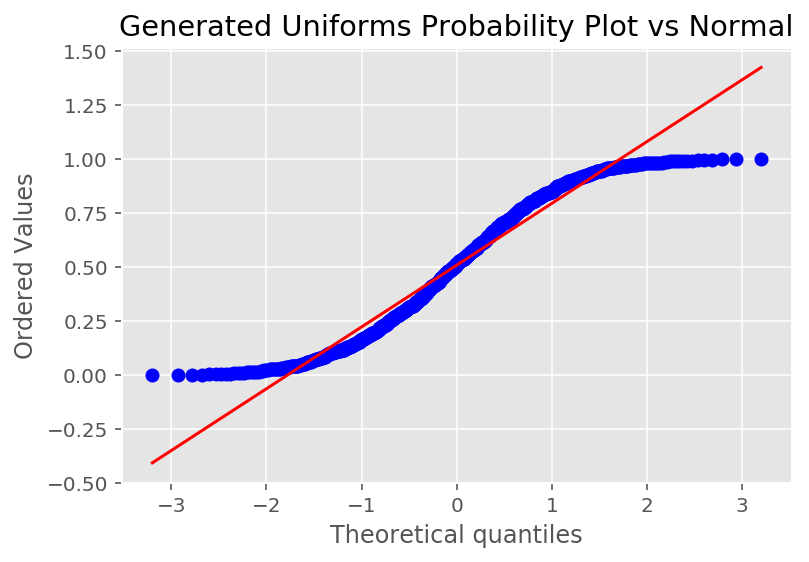

In [47]:
stats.probplot(uniforms, plot=plt)
plt.title("Generated Uniforms Probability Plot vs Normal")
plt.show()

In [48]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

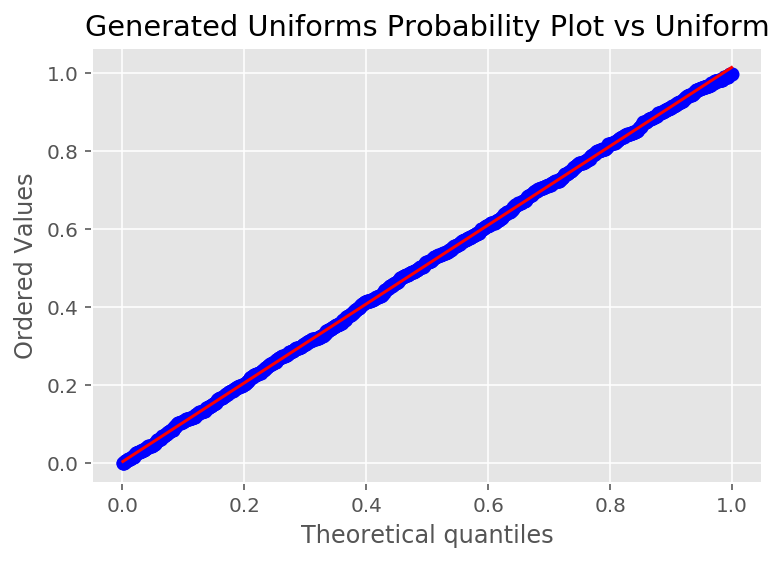

In [49]:
stats.probplot(uniforms, plot=plt, dist=stats.uniform)
plt.title("Generated Uniforms Probability Plot vs Uniform")
plt.show()

In [50]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

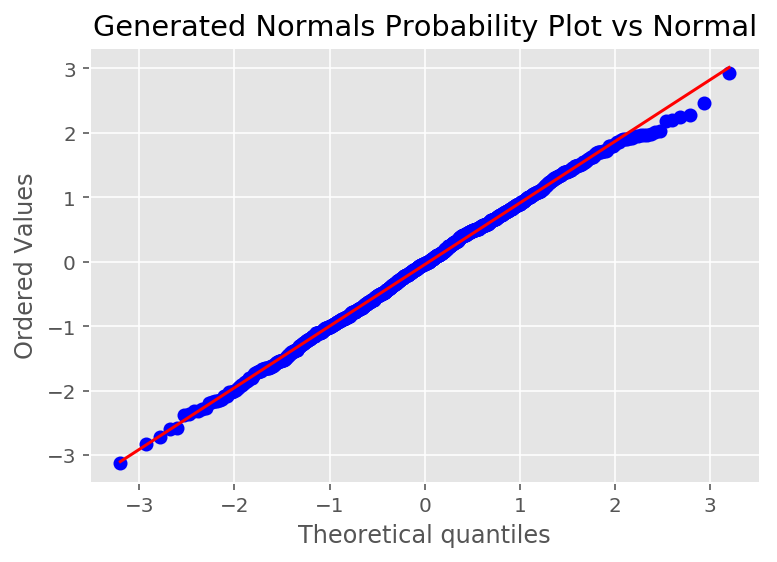

In [51]:
stats.probplot(normals, plot=plt)
plt.title("Generated Normals Probability Plot vs Normal")
plt.show()

## Boxplots

Use boxplots to compare distributions.

In [52]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

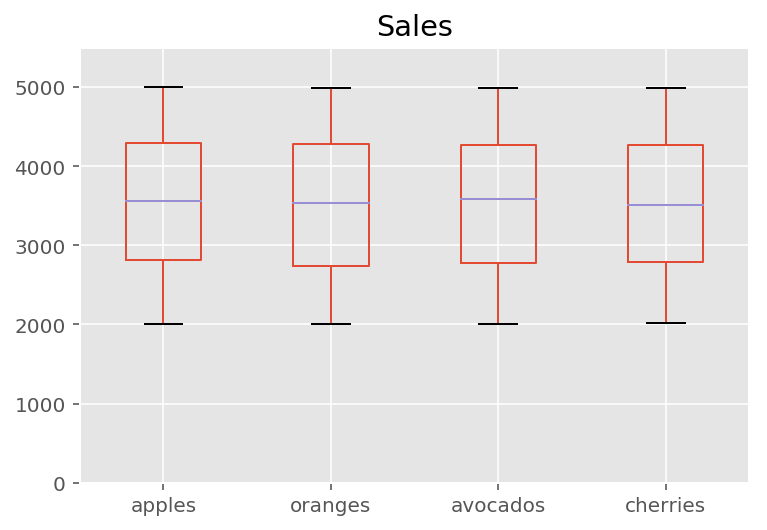

In [53]:
ax = sales.boxplot(["apples", "oranges", "avocados", "cherries"])
ax.set_ylim(0, 5500)
plt.title("Sales")
plt.show()

In [54]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

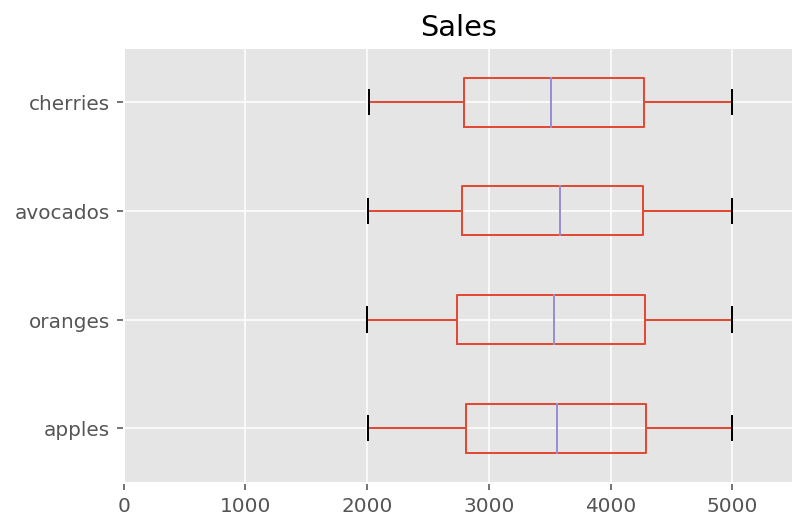

In [55]:
ax = sales.boxplot(["apples", "oranges", "avocados", "cherries"], vert=False)
ax.set_xlim(0, 5500)
plt.title("Sales")
plt.show()

### Line Charts

Line charts are used to plot continuous data. That is data about the same entity that changes over time.

In [56]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [57]:
nMonths = 12
sales = [np.random.randint(2000,5000) for i in range(nMonths)]
months = [str(i) for i in range(1,nMonths+1)]

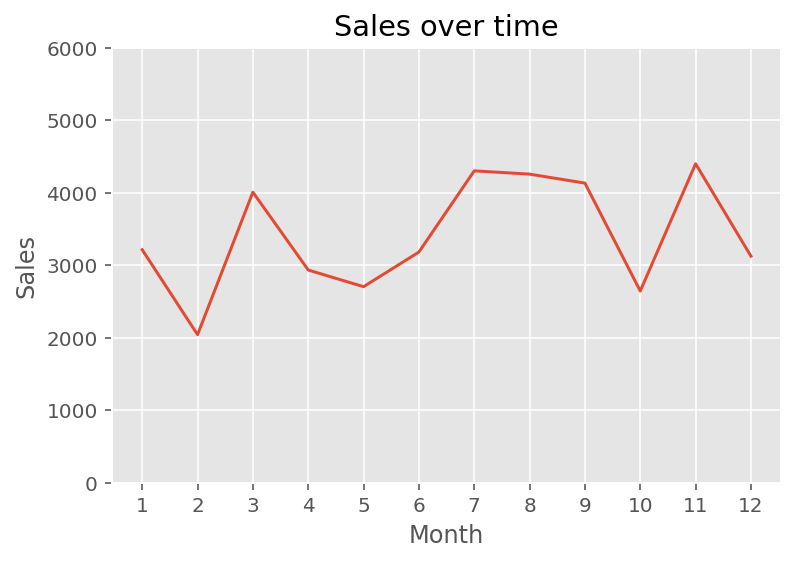

In [58]:
plt.plot(sales)
plt.xticks(range(len(sales)),months)
plt.title("Sales over time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.ylim(0, 6000)
plt.show()

## Line Charts

Graphing multiple lines on the same chart may be hard to follow.

In [59]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [60]:
year_1 = [np.random.randint(2000,5000) for i in range(12)]
year_2 = [np.random.randint(2000,5000) for i in range(12)]
year_3 = [np.random.randint(2000,5000) for i in range(12)]

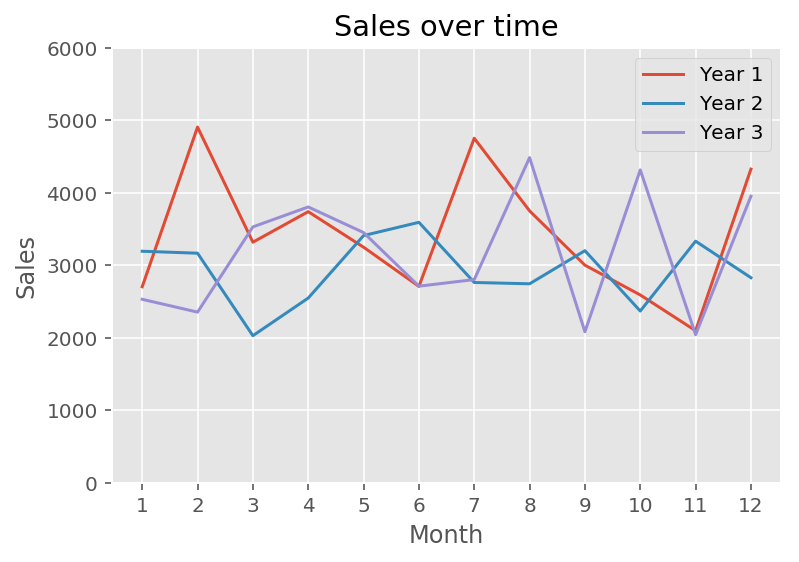

In [61]:
plt.plot(year_1, label="Year 1")
plt.plot(year_2, label="Year 2")
plt.plot(year_3, label="Year 3")
plt.xticks(range(len(year_1)),months)
plt.legend(loc="best")
plt.title("Sales over time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.ylim(0, 6000)
plt.show()

## Line Charts

Instead, use multiple panels of line charts using the same scale. You can also add a line to show the average for all the data sets as a reference point.

In [62]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')


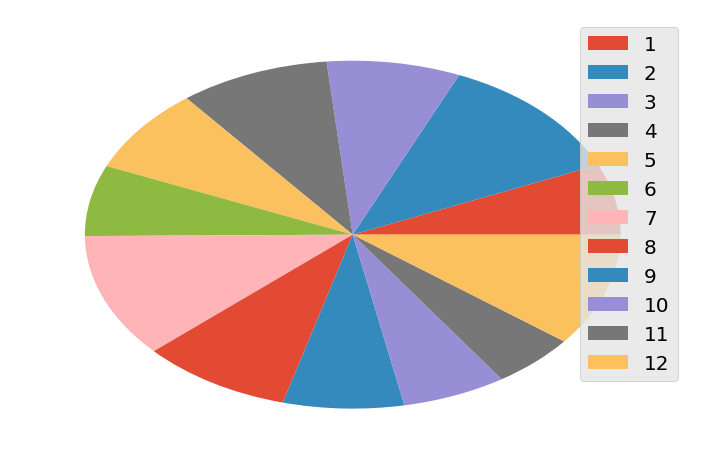

In [63]:
HTML('''<form action="javascript:code_toggle()"><idata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsEAAAHWCAYAAACWilTKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xl8XGd9LvDnPbPPaF8syZJtybskO17lJV4jJTYUCAE+kBLaCpqm4ebS3JpiGCilJBTKRYAhCSSGkgQCl6ShUKAhBVPFHsexYlm2433fJVnSaN9mOee894+RiZPYiW3NzDvL8/18Bimj0ZxHxpYenfmd9xVSShARERERpRNNdQAiIiIionhjCSYiIiKitMMSTERERERphyWYiIiIiNIOSzARERERpR2WYCIiIiJKOyzBRERERJR2WIKJiIiIKO2wBBMRERFR2mEJJiIiIqK0wxJMRERERGmHJZiIiIiI0g5LMBERERGlHZZgIiIiIko7LMFERERElHZYgomIiIgo7bAEExEREVHaYQkmIiIiorTDEkxEREREaYclmIiIiIjSDkswEREREaUdlmAiIiIiSjsswURERESUdliCiYiIiCjtsAQTERERUdphCSYiIiKitGNVHYCIiIgoEbS0tJQLIf5WCPFuALmq86SRXinli1LKHyxatOhsvA4qpJTxOhYRERFRQmppaSnXNO2XHo8nx+l0DloslrAQQnWslCelhGEYtkAgkDk8PNxnmuYH41WEOQ5BREREaU8I8bcejycnIyOjx2q1sgDHiRACVqs1nJGR0ePxeHKEEH8br2OzBBMREVHaE0K82+l0DqrOkc6cTufg2ChKXLAEExEREQG5FoslrDpEOhv784/bLDZLMBEREREiL82TOvH+82cJJiIiIqK0wxJMRERERGmHJZiIiIiI0g43yyAiIiJ6B8Z9dy5SneHtWH74mxbVGZINSzARERERAQCeffbZ3KampoyjR4+6T5065R4ZGdHWrVvX89RTT51RnS3aWIKJiIiICADw/e9/v+TUqVMul8tlFhYWhs6fP+9UnSlWWIKJiIiICADwT//0TxfKyspCs2bNCjY2NmbW19fPVJ0pVliCiYiIiAgAcMcdd6TNrnlcHYKIiIiI0g5LMBERERGlHZZgIiIiIko7LMFERERElHZYgomIiIgo7bAEExEREVHaYQkmIiIiorTDEkxEREREaYebZRARERERAOAXv/hFzu9///scAPD7/TYAOHDggOe+++4rB4Dc3Fz9G9/4xkWFEaOGJZiIiIjoHVh++JsW1Rni4eDBg+7f/e53+Vfe197e7mhvb3cAQFFRUQhASpRgIaVUnYGIiIhIqb17954tKiryq86R7jo6OgoWLFhQHo9jcSaYiIiIiNIOSzARERERpR2WYCIiIiJKOyzBRERERJR2WIKJiIiIKO2wBBMRERFR2mEJJiIiIqK0wxJMRERERGmHO8YREY3T5k2HbQDsY7cr37/WfbaxGwCEAehjb6+8vfm+qz0mfP+GKjPmXyARUQpiCSaitOX1eh0A8gHkXfk2212t5WUumgwgG0DWm95eft+NSKG1AhDxTx+xedPhAIA+AP1X3N7uv9/8sf77N1QZ8U9ORKQWSzARpRyv15sNoAzApDe9LQNQjEjZzUOkyL7FaOjSdgCr4hJ2/JyIfE3FN/n5cvOmwz0ALo3d2q94//J/twG4eP+GqqHxxyUiSgwswUSUVLxebxbeWm7f/DZzPMfQjcGsccZMJgKRs+D5AKrf7oGbNx0eAHBx7NZ6xfvnAZwCcOb+DVV6TNMSEUUJSzARJRyv1zsRQOXYbTaA6YgU3EkYZ8G9HqYMTYz1MZJUFoCqsdvV6Js3HT4L4MRVbuc4dkFEiYQlmIiU8Hq9FgBT8XrZvVx4ZyMyd6tSoWGG+i2aXXWOZGNF5BeW6QDe/aaPhTZvOnwGVy/IF3iBHyW69//s6CLVGd7Orz82u0V1hmTDEkxEMeX1el0AZuGNZbcSkaLkUBjtbYX0nlaXvZglOHrsiPw9mHWVjwU3bzp8FMBrAPYB2Atg3/0bqvrimI8o7XV1dVl++ctf5r700kvZp06dcvn9frvVajWnTp06+qEPfaj73nvv9VssFtUxo4YlmIiixuv1FgBYMnZbjMiM6RQoXD3hZgXDXb0u+81ea0Y3yAFg3tjtry7fuXnT4XOIlOLLt733b6g6pyQhURp4/vnn87761a9OzsvLCy9atGhw4sSJvX6/37Z169achx56aMq2bduynnnmmdOalhrbTLAEE9FN8Xq9HgCLANTg9eJbrjJTNAXD/rDqDIQpY7f3X75j86bDvXj9jPHl2+H7N1Tx/y+icZo+fXrgscceO3nnnXf2X3nGt7W11fqe97yncuvWrbnPP/98zt13350Sr9KwBBPRO/J6vVYAcxEpupdLbxWA1Hld7E1Cel/CjmqkuVwAa8dul4U2bzq8H8ArAF4G8PL9G6ra4x+NKLmtW7du8Gr3l5aW6h/+8Ie7vv/975fu3LkzkyWYiFKW1+udjtfP7i4BMB+AS2moODOMkXzVGei62REZv1kM4EEA2Lzp8GlECvGOsbdH7t9QJZUlJEpyNptNAgBngokoZXi9XoHIWd61AG5DZJOItC+AEkaZlFIKIZJunpkARFYemYrXZ4y7N286/KczxQB237+hKqQqHFEyCYfD+M1vfpMPALW1tf2q80QLSzBRGvJ6vVWIFN7bAKwBUKA2UUJy68ZQq82aWao6CEVFPoD3jd0AILB50+HdeL0Uv3z/hqqU+eFOFE3/+I//WHbmzBnXsmXL+t/znvcMqM4TLSzBRGnA6/VOBrAOwO2InPEtUhooSQT17ksswSnLCWDl2A0AjM2bDjcD2ALgDwCauPsdEfCd73xnws9+9rOiyZMnBzZv3nxGdZ5oYgkmSkFerzcTkbO86wDcAWCm2kTJKRjuGspwlquOQfFhAbBs7PZPAAY2bzr8EiKF+A/3b6g6qTIckQqPPvpoYUNDw6QpU6YEnn/++WMFBQUptesjSzBRChib660B8C5ESu8y8N/3uAXD3ZwHTl9ZiCzN9v6wNI8saWjUZOQs8YsAXmreWDuqNh5RbH3729+e8K1vfWtSRUXF6PPPP3+8pKQk5V4Z4Q9JoiQ1tmzZGgAfROSHNV+2jzLdGPCozkBqSSlDLxg9VgnMQGS3u08BCNQ0NG4F8DsAv2neWMsNPCilfP3rXy9+9NFHS6dPnz767//+78eLiopSrgADLMFESWVsC+J1iBTf9wLIU5sotRlmkLPTae6UDOz0Q1/zprudiLzq8i4Aj9Q0NO4B8CsAv2zeWHs43hmJoukrX/lKyRNPPDFx5syZI88///zxVBuBuBJLMFGC83q92YgU3g8CWA+AZyfjRpaaUh/VhDWt1kimiLA0j2wz+1dcx0MXjt2+UtPQeAyRQvwrAM3NG2u5NjEljSeffDL/iSeemKhpGhYuXDj02GOPveVEwKRJk4L33ntvt4p80cYSTJSAvF5vEYC7AHwAQC0Am9pEaUuE9b4LDlsBLyxMM1eMQdzoz8lZALxjt4s1DY3/iUgh9jVvrE3Jl5TTxa8/NrtFdYZYO3/+vAMATNPEs88+O+Fqj5k/f/5QqpRgISV/SSVKBF6vdyoipfcDAJYD0NQmIgDIy6xpynZXLlOdg+LrpDm6bavZ/+YxiPHoRqQM/wzANp4hTjx79+49W1RU5FedI911dHQULFiwoDwex+KZYCKFvF5vIYCPIbKr1QLFcegqgmF/QHUGiq8bGIO4EfkA/mbsdqGmofHnAH7WvLF2f5SPQ0TXiSWYKM7GVnV4D4CPj73lqEMCC+m9/P8njYxjDOJGTALwWQCfrWloPIDI2eH/17yx9kIMj0lEb8ISTBQnXq93DoBPAPgLAFedtaLEoxvDOaozUPxcYzWIWJoL4OsA/rWmoXE7gJ8CeL55Y21fHDMQpSWWYKIY8nq9uQDuQaT8LlIch26ClOEy1RkoPmI0BnG9BIDVY7fHahoafw3ghwD+yPlhothgCSaKMq/Xa0FkKbOPA7gTgENpIBqvbN0Y8Vst7gLVQSh24jQGcb3sAD48djtd09D4IwBPNm+svaQ2FlFqSYR/7EQpwev1zkak+P4lgIlq01A0hfSeVpbg1KZgDOJ6TQXwVQAP1TQ0/hbADwD8oXljrak2FlHyYwkmGgev12sH8FEAnwTAZbRSVDDcNeB2cCoiVSkeg7heVry+hOK5sbPDP2reWNumNhZR8mIJJroJXq+3AMD/AvAAgGLFcSjGgmE/z7qlqAQbg7heUwA8DOCfaxoa/wvAY80ba/+oOBNR0kmmf/REynm93ioAGxBZ4cGpOA7FSUjv57bJKSqBxyCuhwXA+wG8f2ypte8gsvZwUG0souTAEkx0Hbxe73pEyu961Vko/gwzUKg6A0VfkoxBXK+5AH6EyFJrTwD4fvPG2g7FmYgSGksw0TV4vV4nIhe5/T2AKsVxSCmzTEpTF0Lj98wUkaRjENdjAoAvAfjc2K50m7grHdHVpdo/fqJx83q9xQD+NyIXu3FFAAIAW9joP2O35laoDkLRkeRjENfDgchqNR+vaWh8CcAmAP/FNYeJXscSTDTG6/XOA/BpAH+OyDqdRH8SDHd3sQSnhhQbg7get43djtQ0NH4NwM+bN9YaijMRKccSTGnP6/XeDuALiPyQILqqYLhrNNM1XXUMGqcUHoO4HpUAngHw5ZqGxn8F8JPmjbVhxZmSxm+f60voXT/fd3dOi+oMySYdvwkQAQC8Xm8dgC8DWKk4CiWBYLhHU52Bxu+kDLzih75WdQ7FpgH4NwBfqmlo/L+IrDfMFSUIAOD1eksPHTrkuXDhgrO/v9/qcDjMoqKiUG1tbe8DDzzQWVhYmDKvIrAEU9rxer21iJTfVYqjUBLRjcEs1RlofELSPOwz+/nv/nWTAXwPwBdrGhq/CeCJ5o21I4ozkWI///nPi2bMmDGyZMmSgfz8/PDo6Ki2f//+jB/84AcT/+M//qPwN7/5zZHy8vKUeAWBJZjSxlj5/WcAq1VnoeRjyhC3wk5iUsrQ74wem4ysrUtvVALgWwC8NQ2NmxDZfGNQcSZS5OjRo3tdLtdbLqD84he/WPrUU08Vf+tb3yp59NFHz6vIFm18eY9Snu6rv7X/j594LtNh/BwswHTzCg0z1K86BN2csTGIGapzJLhCAF8DcKqmofH/1DQ08gLhNHS1AgwAH/jAB3oA4Pz58474JoodlmBKWbqvfp7uq/8vADs8dvMjG2s7jSm5oSOqc1HyCuk9F1VnoBvHMYgbVojI7nPHahoa/7KmoZFdgfDiiy/mAMDMmTNHVWeJFo5DUMrRffUzADwM4G4A4vL9mkDJ3yzrznnxSOYrr5zNuFVZQEpawXBXn8terDoG3QCOQYxLOYCfAPhMTUPj55s31v5OcR6Ko4aGhqLh4WHL4OCg5dChQ+4DBw5kTJ06dfQf/uEfLqnOFi0swZQydF99MSLl9xO4xt9tIeD6s6rBW6fmh7b9tCV3NSDE1R5HdDXBsD8lLgZJJ1wNIipuAfBCTUOjD8DnmjfWNqkORLH34x//uLi3t/dPP0uXLl068Nhjj50pLi7WVeaKJr7EQUlP99XbdV/9ZwEcB3AfruOXu9lFwTWfua2z2WExefEHXbeQ3pcys3DpgGMQUbcawM6ahsZf1TQ0VqoOQ7F18ODB11pbW1uam5tf+853vnOqtbXVsX79+qpdu3a5VWeLFpZgSmq6r/69AA4C+L8AMm/kc3Nc5hLv7R0d+R49Ja5ypdgzjJF81Rno+nAMIqbuAnCgpqHxezUNjXmqw1BsTZw4Uf/whz/c9/Of//z44OCgdcOGDSmzcyZLMCUl3Vc/S/fVvwjgtwBu+opvmwXT/351V0ZlUWBv9NJRqpIwJkkpr3rlNCUWrgYRcxYADwA4XtPQ+ElePJf6pk6dGpoyZUrg7Nmzzo6OjpQYp+VfWkoquq8+S/fVfwvAAQDvisZzCoG8exb2zn3X7AFfNJ6PUppLN4baVIegt8cxiLjKB/A4gN01DY0rVIeh2PL7/TYAsFqtKXEygCWYkoLuqxe6r/6vEZn7/TQAWzSfXwhYV04dXn3/rX6fJiQvfqJrCurdKXNldCriGIQyCwC8XNPQ+ExNQ2OJ6jB0cw4ePOhsbW19y1lewzDwxS9+sbSvr886Z86c4fz8/JTYOjklTmdTatN99csBPAJgcayPNSknvNpb1/Had32FZcMhC+c/6S2C4a6hDGe56hh0DVwNQrm/AHBXTUPjVwB8p3ljbUh1ILp+f/jDH7K+853vlM2bN29o0qRJwZycHN3v99v27NmT0d7e7sjLyws3NDScVZ0zWgTH2yhR6b76EgDfAPAxXLHebzwYJi7+YGf+SGu/fWY8j0uJz2GbsG1i3rvWqM5BbxWS5uFnjM5ZPAucMI4D+FTzxtotqoNcj717954tKiryq86h0r59+5xPPvnkhH379mV0dXXZhoaGrE6n05g0aVJw9erV/Z/61Kc6CgoKYnoWuKOjo2DBggXlsTzGZSzBlJB0X/0nAHwbQI6qDFJi6DcHsw42X/AsU5WBEo9Fc7ZMLvzIItU56I2klKFfG93neDFcQnoGwIbmjbXdqoO8HZbgxBDPEsyZYEoouq9+0tiqD09CYQEGACGQceecgaUfmd+7DeBvixRhmEFuGZeAuBpEQvtLAEdrGhr/QnUQoiuxBFPC0H31f4vImr9RWfUhGoSAuGViYM2GNV1NNos5ojoPJQI50ZT6qOoU9DquBpEUCgA8U9PQ+N81DY2TVYchAliCKQHovvpy3Vf/RwCbAWSpznM1+R5j+efrOs/nuHQuj0UirPddUB2CIrgaRNJZD+BgTUPjAzUNjdy2npRiCSZlxpY9+xQia/7Wqc7zTuxWOfvTa7tsMwoC+1VnIbUC4a6Enm1MJxyDSEqZAL4H4KWahsZpqsNQ+mIJJiV0X/10AFsBPAogQ22a66cJFP5VTe/s2hmD21VnIXWCYX9QdQbiGEQKWANgf01D46dUB6H0xBJMcaX76jXdV78BwGsAVqvOczOEgL12xtCqe5d2+wRkSiwYTjcmFO6N6mYtdOOklKEXjB47xyCSnhvAozUNjS/UNDQWqQ5D6YUlmOJG99VXAPAhsvSZW3GccavID63+bF3nPpfN7FOdheJLN4eVrlxCkTGIbujTVeegqPkzRM4Kv0d1EEofLMEUF7qv/kMA9gJIqb3lMx3mos/VdfQVZYZPq85C8SNluEx1hnTGMYiUNQHAf9U0NH6vpqHRpToMpT6WYIop3Vfv0H31jwH4BYBs1Xliwaqh/FMr/QXzS0eaVWehuMnWjZEu1SHSEccg0sIDAHbXNDTOUx2EUhtLMMWM7qufBuAVAP9bdZZYEwJZH7qlf9Fdc/u2qc5C8RHSe7hcngIcg0gbVQB21TQ0/gOXUqNYYQmmmNB99R8BsAfAQtVZ4kUIaIsnja75u1VdO6yaDKjOQ7EVCHcNqM6QbjgGkXbsAL4J4Pc1DY0FqsNQ6mEJpqjSffVO3Vf/OIDnkKAbX8RaUaa+wlvXcSrLYXSozkKxEwr7TdUZ0gnHINLaHQD21DQ01qgOQqmFJZiiRvfVzwTQBOCTqrOo5rTJ6s/UdsryvOBh1VkoNkJ6Py/ciSOOQaS9SQC21zQ03q86CKUOq+oAlBp0X/1HEdn2OFN1lkShCRTfu7Qn5w/HMndsP52RUqtiEGCYgULVGdIFxyBojAPAEzUNjcsA/K/mjbVxHTt75JFHFsXzeDfqwQcfbFGdIdnwTDCNy9jqD5sB/D+wAL+FEHCunz244q8W92wTkHz5PKWYk6Q0w6pTpDqOQdBVfBzAKzUNjRWqg6SLp59+Oq+0tHRRaWnpos2bN6fMfDZLMN003Vc/AUAjgL9VnSXRzZwQXPOZ2zp3OyzmoOosFDXWsN5/UXWIVMcxCLqGBQBaahoa3606SKo7e/as7Wtf+9pkl8uVcidyWILppui++nkAmgHcqjpLssh2mUu8t3d0Fnj0c6qzUHQE9W6uFRxDHIOgd5CLyOYaX1IdJFWZpokHH3ywIisrS//gBz+Yct/vWILphum++g8A2AFgsuosycZmwbT/s7orq6p4dI/qLDR+wXDXqOoMqYpjEHSdNAAP1TQ0/rSmodGhOkyq+e53vzthz549md/4xjfOut1ungmm9Kb76r8A4D8AeFRnSVZCIPejC/pueU9Vv091FhqfYLiH30NjhGMQdIM+BmBLTUNjvuogqeLAgQPORx55pOzuu+/urK2tHVKdJxb4DZyui+6rt+m++qcBfBUAd+8ZJyFgXV4+svp/3erfbhEypDoP3RzdGEzLtbBjjWMQdJNWAdhZ09DIX57GKRwO48EHH6yYMGFC6OGHH07Zax9Ygukd6b76HAD/DaBedZZUU5oTXvW5uo6jHrvhV52FbpwpQ6WqM6QajkHQOM0A0FTT0LhSdZBk9pWvfGXiyZMn3d/85jfPeDweqTpPrLAE09vSffVTEJn/rVWdJVW57fKWz9Z2BspyQsdUZ6EbVmCYoX7VIVIJxyAoCvIB/LGmofGjqoMko1deecX91FNPldxzzz0dq1atGladJ5ZYgumadF/9YkR2gKtSnSXVWTSU3b+8u2zJ5OEm1VnoxoT0npR9qTDeOAZBUeQA8LOahsYvqg6STMLhMDZs2DC1rKws8NBDD7WqzhNr3DGOrkr31d8B4D8BuFVnSRdCwPO+6oGlU/NDW5/dm7MGEJy9TgLBcFefy16sOkbS4xgExYAA8JWahsZSAA80b6xN2Zf1o2VwcNBy8eJFBwBMmzZt4dUe8/DDD095+OGHp9x9992d3/72ty/EN2F0sQTTW+i++vcgsgIEl5uJMyEg5pQE1m7I6mp67OWCuWFD4yocCS4Y9nPXuCgYG4NYqzoHpaRPAsioaWj8ePPGWkN1mETmcDjM973vfVe9RuXo0aPuEydOuOfOnTtUXl4eWLx4cdKvGMESTG+g++o/COBZADbVWdJZvsdY9vm6zmOPvlzg6R2xlqnOQ9cW0vucqjMkO45BUBz8BQBPTUPjnzdvrOWKPNfg8XjkE088cdUNnb785S9PPHHihPsDH/hA9/33358SF3NzJpj+RPfVfxTAc2ABTgh2q5y1YU2Xc0ZhYL/qLHRthjGSpzpDMpNSBjkGQXHyAQC/rWlo5JgfAeCZYBqj++o/DuBH4C9GCUUTKPirxb3ZW09lbP+f45k8U5aAJIxJUkopBGe4b8ZJGWjqhr5GdQ5KG+sA/HdNQ+N7mzfWDtzIJz744IMtMcpEiggpOSee7nRf/ScBfB/cBCOhne2x+Z58Nf9WUwr+8ppgyvI/cNFmzeTYyg0KSfPwM0bnLJ4FJgV2A3hX88ba7st37N2792xRUVFKvMyfzDo6OgoWLFhQHo9j8axfmtN99X8P4HGwACe88rzw6s/Wdu532cxe1VnojYK6v0N1hmTDMQhSbDGAbTUNjVzaJY2xBKcx3VfvBbBJdQ66fhkOc+Hn6joGSrLCp1RnodcFw/6UXlA+FsbGILgpBqlUjcimGvmqg5AaLMFpSvfVPwTgX1XnoBtn1TDlgRX+wgWlI7tUZ6GIYLibc2U3YGw1CG5rS4mgGsDvaxoas1QHofhjCU5Duq/+nwB8SXUOunlCIOuDt/Qv/uAtfdtUZyFANwYyVGdIFhyDoAS0CMALUnIsMN2wBKcZ3Vd/H4CHVeeg8RMC2sKy0TUPruraYdVkQHWedGaYQc4VXieOQVCCWjkYMieYUrIIpxGW4DSi++rfj8hFcJRCJmTqKz5/e8fpLKdxSXWW9CUnmlIfUZ0i0XEMghJZ2ISzfTA8latmpQ+W4DSh++pXAPg5+BJkSnJYZdVnbusUFXnBQ6qzpCkR0nsvqg6RyDgGQclgNGzktA+FK1iE0wNLcBrQffVVAH4LwKU6C8WOJlD010t7pq2eNrRDdZZ0FAz7u9/5UemLYxCULEZCRl7HUHiK6hwUeyzBKU731ZcB+D2AXNVZKPaEgHPdrMEVf1XTs1VAmqrzpJNg2B9UnSFRcQyCks1QyCjwD4dLVOeg2GIJTmG6rz4XkQLMnazSzMzC4NrP1Ha2OKzmDW0LSjcvFO6xqc6QiDgGQcmqL6BP7A/oPIGUwliCU5Tuq3chMgJRpToLqZHtNGs+X9fhL8wIn1WdJR3o5jB/WF4FxyAomflH9IqRsOFRnYNigyU4Bem+egsiF8GtUJ2F1LJaMPXBVf6cOcWjLaqzpDop9VLVGRINxyAo2UkpxaXB8PSQYdpVZ6HoYwlOTY8AeL/qEJQYhEDO3Qv65r+3qp8ba8RWtm6MdKkOkSg4BkGpwpTS2jYYmmGYkn+XU4xVdQCKLt1X/3EAD6jOQYlFCFiWlY+smZQb2v6DVwqWGlLwrEYMhPSeNqvFXag6RyIYG4NYozoHUTTohnSWnP7CfNU53k7n9H/lK343iCU4hei++vkAvq86ByWu0mx9lff2jv3f3VZYMhSysKxFWSDcNeB28DpUjkEQJa+FCxfO7ejouOqJktzcXP3gwYOvxTtTrLAEpwjdV58D4D/AtYDpHbhs8pbP1na2/VtT/tHzffbZqvOkkmDYn/bL0nEMgij5eTwe45577um82v0q8sQKS3AK0H31AsBPAUxVnYWSg6Zh4n3Lu3NeOJy1s+mcZ7nqPKkirPe7VWdQ7aQM7OyGvlZ1DiK6eRkZGcaXv/zlNtU5Yo0XxqWGfwTwHtUhKLkIAfd7qweWf3Rh71aAe4RGg2EGClRnUGlsDGKV6hxERNeDZ4KTnO6rXwfgIdU5KHlVFwfWfnptV9Oj2wvmhg2N62GOizlJSjMshJZ2G2dwDIIodYTDYfHjH/847+LFi3a3223OmTNn9Lbbbhu0WlOrNqbWV5NmdF/9ZAD/DzyjT+OU5zaWff72juOPbS9094xYeWXXzbOG9f4zdltuheog8cYxCKLU0dPTY/vCF77whu9jxcXFoW984xtn6urqhlTlijaWpySl++odAH4BIF91FkoNdgtmbljT5Zo9IbBPdZZkFtT9abdWMMcbrZlwAAAgAElEQVQgiFLH+9//fv9TTz11vLm5+bVjx47tfeGFFw7dddddXR0dHfb77rtvRktLS8pcgM8SnLy+C6BGdQhKLUIg/2OLeqvXzRrwqc6SrALhrlHVGeKJYxBEqeWf//mf29etWzc4ceJEPSMjw5w/f37ge9/73vl77rmnIxgMag0NDRNVZ4wWluAkpPvqPwzgftU5KDUJAdvqacOr71vm92lC6qrzJJtQuDetvq+OjUFMV52DiGLrr//6r7sAYN++fZmqs0RLWn2zTgW6r74IwOOqc1Dqm5IXXv25us4DbpvRozpLMtGNwSzVGeKFYxBE6aO4uDgMAIFAIGW6Y8p8IWnkh+AcMMWJx24u+Fxd51BJVvik6izJwpShlHmp8O1wDIIovezYsSMDAEpKSoKqs0QLS3AS0X319QDepzoHpReLhskPrPAXLSob2aU6S5IoNMxgv+oQscYxCKLU89prrzn9fv9bfrE9ffq0/aGHHpoMAO9973u7458sNrhEWpLQffVliFwMRxR3QiDzrrn9NRX5oa2/eC1nreo8iS6k91x02UuyVeeIFY5BEKWmX/3qV3lPP/108cKFCwdLS0uDHo/HuHDhguOVV17JCYVCYtmyZf2f+cxnOlTnjBaW4CTxveDFRzywHJ1pcQerLJ6pOYJruVJ8CQExv3R0bWl26JXvvVy4QDdFyiyTE23BsL/PZS9RHSMmOAZB6eqV3C9dflc6NYy6zaDpCQ7Z7KFRxxseKISJkkmHhd2RdGMDq1atGjhz5ozj2LFj7oMHD3oCgYCWkZFh3HLLLYN33XVXT319fbempc4QgZDcLTXhbdpS95cAfnLlfRpwpljYz1dbPO5pmqvaJjS3oniUhoK6OPLo9oKcvlFraja9cXI7Jm0tyrltreocsXDCHN26zexfqzoHUbT964ps2DNzrvoxixBhN/SgRx8RrsCQSzONt2+CducQSsqOCSFiETWldXR0FCxYsKA8HsfimeAEt2lLXSGATW++3wQq2mSook0PYQt6gy5oe6ZqrsFqi2dikWafoSAqpRGHVVZ+em1X59O78g6e7nbMUZ0n0YT0Psc7Pyr5cAyC0oh0anLUY4ZMd2DIbg+P2gFc/3booUAG+nsnICevM3YRabxYghPfI3jn1SAcozAXHjKHccgchgDa84XtVKXmtsyyuGe7hCU3HkEpvWgCEz6xpCf7f45nvLz1VOZK1XkSiWGMFKjOEG0cg6BUpwmpZwoj4AmPaK7AkFOTxvheYe3vLZUZmb3CagtHKSJFGUtwAtu0pW4dgD+/0c+TQIlfhku2G/3YbvSbdohDkzVnV7XFk18mHFWaEPwhRlEhBBy3zxpaWZ4f2vbjXXkrJfh3CwAkjElSSilS6LXQsdUg1qrOQRQ1UgZyQ4MHl3ftH17f1jTFs/jT5QVyOCN6z29q6PGXYkLJ2ag9J0UVS3CC2rSlzgLg21F4Ki0EWX3SHMVJcxQA+rKF9chMzaVXWTzTswRnOmn8pheE1mys7dz9iK9wRkDXUnZVhBvg1I2hizZrZkpcwMoxCEoVVlM/O2vg3Lk72l71LPUfqnaY4cWXPxaTXYFGhvPl6EiXcLmHY/H0ND4swYnrfgDVMXjenH6pL282BtFsDMICnJwoHK1VFk/mVM1VZRXCGYNjUhrIcpqLvXUdZ76/o6Cnc8hWoTqPakHd35EKJZhjEJTUpBzJCw0curVz/8i6tqbystGucgDlcQwA9PonSeekoyn0wlDKYAlOQJu21OUAeCgexzKA6RdkcPoFPQgAo25ou6dprpE5Fk9ZgWafGo8MlDqsFlT83Sp//7/vy2k50O5apDqPSsFQ11CGM/l/F+AYBCUbq6mfmd1/9vy6tlczlnQfqrabeo3SQKGgB4P9+cjKSZlNJlIFS3Bi+icAKi6scY3AXHzAHMaByAV2rYXCdrrK4rHN1NyVDsGXuemdCYHsj8zvm1+RF9r2m0PZa1TnUSWodyf9aR+OQVBSkHK4INh3aEXna4E72ndVTBz1VwBIrN9A+3siF8lpFlN1FHodS3CC2bSlbjqAT6nOAQASKO2U4dJOvQ9b0ac7IPZP0Zw9cywZEyYKe2UqXfRD0SUELEumjKyZlBt6+YlXCmoMU6TkkmFvJ2wMRu8CGwU4BkGJzGaGT1X2nb24rr0ps8Z/uNomjSWqM70tw7Cht7sE+RNaVUeh17EEJ55vArCrDnEV1iDkLcfNURyPXGDXnSusx2Zpbllp8czIEJYJqgNS4inJ0ld66zoOPOIrLBoMptffEdMMFqnOMB4cg6CEIuVQYbDv0MrOfcE72l6dWhzomQZgmupYN2RooEhmZvuTcSe5VMUSnEA2bam7DcD7Vee4Tvm9Ur+1yRhAkzEgrRDHSjXHpWrNk1WuOastQiRikScFXDY5d+Ntne0/ejX/yLlee6XqPPEjJ5pSH9GENel2c+QYBCUCuxE+UdV/unVdW1POou6jVTZpLFWdaVykFOjxl6G49JTqKBTBEpwgNm2pE4jOkmgqCB1y1jkzMOucGQCAoQxY9k23uALVmqc8T7NNVh2Q1NI0lPzNsu6cF49kvfLKWc+tqvPEiQjpvRectsJZqoPcCI5BkDJSDk4I9B5a1bk3fEf7rmkTAr0zAKTWDqiBkRwZGHUJp2tUdRRiCU4kdwGYrzpElGQMwViyzxjCPmMIGnBugrCfq7J4nDM0V5VdaEk9K0k3Rwi4/qxq4NaK/OC2n7XkrgZSf6Y8GPb3OG2FqmPcEI5BUDzZjdDxOX2n2ta3NeUs6DlWbZXmMtWZYq6/ZyKcPBucCFiCE8cXVAeIFROYckmGplzSQ2hEb8gJbV+55uyfY/EUFwv7TF5gl14qi4Jr/mFt16uPbi+oDhmp/QtRMNwVApJnAoRjEBRzUvYXB7oPr+rYa9ze3jytMNg3E8BM1bHianQ0RwYDLuFw8mywYizBCWBse+TF7/jA1GAPwJx/1BzBUXMEAujKE9bjszUPZlvcs93Ckq86IMVerttY+vnbO048tr3Q2T1inaQ6T6yEwr1J8z2WYxAUKw4jdGxu78n29W1NufN7j1dbpLlcdaab8e/DD0fvyU6iKnpPFnF39TMt0X7OVJc036BT3D+qDqCKBAq7pV64w+jHDqNf2iCOlGmOjjmaJ3ey5qzWhODf0RRls2DG36/p6vlZS+6+o53OVBkFegPdHM5VneF6cQyCokbK/pJR/+E1HXuMuvbmGfmhgVkAkmo2noCXXnop44c//GHRgQMHPIODg9bMzEx96tSpo/fee2/nnXfe2a86XzSwYCi2aUvdSgCrVedIECIMWXnGDFSeiVxgN5AFy+EZFne42uKpyBbWpN+Clt5ICOR9bFFv1stnPL7fH81KuX8HUupJ8XeWYxA0LlJKpxE6ekvvic71bU25t/SeqLZAJuXZXor4l3/5l5LHH398YnZ2tr5ixYr+CRMmhHt7e61Hjx5179ixI5MlmKIlbc8CX4esARjLWoxBtBiD0IAzJcJ+ocricU/TXFU2oSXd0lP0VkLAumrq8OopuaHt/9aUv8yUwqY6UxRl6cZIp9XiTtg1kjkGQTdFyt6Jo11H1l7aY9Zeap6VFxqsRDINwNM1Pfvss7mPP/74xMWLFw/85Cc/OZWdnf2GXe5CoVDKXMfDEqzQpi11CwG8S3WOZGECFa0yVNGqh7AFvUEXtD1TNdfgHItn4gTNnlrL6KShybnhVZ+r69j3iK9w0nAodWbDQ3p3eyKXYI5B0HWRUrqM4JF5vcc717e9WjCn92SlBTJdljtMG4ZhoKGhoczhcJibN28+8+YCDAB2u12qyBYLLMFqpeyKEHHgGIW58JA5jEPmMATQXiBsJ2drbutsi6fSKbQc1QHpxnnscv5nazsv/GBnfk9rf2r8YhMI+wfcjsS89o9jEPR2hJTdpSOdx9ZeapG1l3bPygkPVQHRv6CLEsf27dszLl26ZF+7dm1vfn6+/utf/zr7yJEjLofDYS5evHh41apVw6ozRhNLsCKbttRNBfBB1TlShQRKumS4pMvox3aj37BDHJysOf3VFk9BmXBUakLwpd4kYdEw6ZO3dg/958HsV1suuJN7hygAwbD/LWdSEgHHIOgtpDRdRvDIgp5jXevbmgqr+05Xajzbm1ZaWlrcAFBQUKDX1tZWnT592nXlx+fNmzf05JNPniouLtbVJIwulmB1/gZAyszVJBhLCHLOSXMUJ81RAOjLFtYjszSXXmXxTM8U1hLVAentCYGMu+b0L5maF9z2/Gu5a1TnGY+w3u9650fFH8cgCACENLsmDXccX9vRIm671DIrOzxcrToTqdPd3W0DgF/+8peFJSUlwSeffPL48uXLh8+cOWP/8pe/PGnXrl1Z995777QXXnjhmOqs0cASrMCmLXVWAB9XnSON5PRLffkuYxC7jEFYgJMThaO12uLJqNBcc6xCOFQHpLcSAmJeaWBNaU7nzu+9XDAvbCTnhZCGGUi4eWCOQaQxKQ23ETiysPuYf33bzglV/WcqBZBc2xpSzBiG8aeTc48//vipRYsWjQLAvHnzAj/96U9PrlixYu6+ffsytm/f7kmF0QiWYDXeA4BnIxUxgOkXZHD6BT0IACMeaLunaa7haotncoFmr1Cdj96owGMs99Z1Hnl0e0F236h1ouo8N84sk9IMC6ElxKoXHINIP0KaXZOHLx2rvbRbW3NpT2WWPjJHdSZKTNnZ2ToAlJSUBC8X4Ms8Ho9ctmxZ/29/+9uC3bt3swTTTbtPdQD6E/cwzMX7zWHsj1xgd3GCsJ2ptHjsMzV3pUNoWaoDEuCwyspPr+3q+klz3oGTfsdc1XlukDWs95+x23IT4hcsjkGkASkNjz56aHH3kZ71bU3FswbOzeLZXroe06dPDwBARkaGcbWPZ2VlGQAQCAS0eOaKFZbgONu0pa4MXBYtYUmgrEOGyzr0PmxFn+6A2D9Fc/bOsWQUThT2SiEE57gV0QQK62t6shtPZLz80snMlarz3Iig7u9KhBLMMYjUpUnz0pSh9pO1l3Zb1nTsqcrQR29RnYmSz5o1a4YsFou8ePGiIxgMCofD8Ybl0E6ePOkCgMmTJwfVJIwuluD4+2vwZchkYQ1C3nLcHMXxyAV23bnCemyW5jYrLZ6ZGcKScLOeqU4I2OtmDq0szwtte3pX3kqJ5Fj1IxDqGsl0qV3xjWMQKUZKPUMfOVTTfaR3fevOkpmDF2YBKFYdi5JbUVGRXldX1/uHP/wh71/+5V9KvvKVr7Rd/tiLL76YtWvXriyPx2O8+93vHlCZM1pYguNo05Y6DZESTMkpv1fqtzYZA2gyBqQV4lip5miv1jw55Zqz2iJSaqezhDatILTms7WdLd/1FU4P6Fq26jzvJKT3KC+eHINIfpo02yuG2k7Wte+yrerYW+UxgvNUZ6LU87Wvfe3CoUOHPE8++WTJ7t27M+fOnTvc2tpq9/l8uZqmyYcffvhcXl7eVcclko2QMmU2/kh4m7bUrQfw36pzUEwMZcByeLrFFZijeabkarYpqgOlA93E2cdfLpAdQzblowZvRxP2/VMm/Lmyl6dD0jz8jNE5i2eBk4yU4czwyKGa7kN972prKp0+eDElNpBJVD2f+ToKHIrPZbjcvaKo9LTaEIDf77d8/etfL3nppZdy/X6/zeVymfPmzRv8u7/7u0srV66M6QVxHR0dBQsWLCiP5TEu45ng+PqY6gAUMxlDMJbsM4awzxiCBpwrEvZzVRaPc7rmqrILLUN1wFRk1VD+qVX+/udfy9m9v821WHWeazFlSNlqMGNjEA4W4OSgSaNt6mDrqdvbm+0rO/dVuY3gfNWZKI4Co9nSNDWhaUo32SkoKDC++c1vXgRwUWWOWGMJjpNNW+psAN6nOgfFhwlMaZehKe16CP+D3pAT2t4KzdlfbfFMLBb2GbzALnqEQPaH5/UtrMgLbvv1wZxE3Vij0DCD/RbNEffRjRMy0NQNPVH/XEjKUHZ4+OAS/8HB9W1NZVOH2qYBSMKlACkqpNQwPJiNzOxe1VHSAUtw/NQByFEdgpSwB2AuOGKO4Ig5AgF05gnr8dmaR5ttcc9yC0u+6oDJTghoNZNH10zKCb/8+CsFNYaZeBughPSeiy57SVxLcEiah7eb/Um1kkY60Ezj4vTBi6dvb9/lXNH1WpXLCC1UnYkSyMhQHktwfLAEx8+HVAegxCCBCd1Sn7DD6McOo9+0QRyepDm6qjVP7mTNWaUJwX+XN6k4S1/5+bqOQ9/1FRYOBhNr9Y5gqKvXZY/fVATHIBKIlMGc8NDBpV0Hh9a37ZxUPnxpKoAy1bEoQQVGsxJhJCId8IdtHIytCnGn6hyUkLQwZNVpM4DTZgAA+rNgOTrD4g5VWzwV2cLKH5Q3yGmT1RtrO9uffDXv8NkeR5XqPJcFdX9cr6bmGIRaFtM4P2Pw/Nnb23e5bu08UOU0Q4tUZ6IkIaWGkaEsZGT1qY6S6liC42MJgIQ6K0UJK3sAxtIWYxAtxiAswOli4bhQZXF7pmuuaqvQXKoDJgNNoOTepT05/30085UdZzJuVZ0HAEJ6vz1ux+IYRPxJGcgNDR5c1nVgeH1b0+TJIx0VACarjkVJamQ4hyU49liC4+O9qgNQcjKAqa0yOLVVD2ILegNuaC0VmmtojsVTOkGzT1edL5EJAde7KwdvrcgLbftZS+4qCaF0m0/DGCmIx3E4BhE/VlM/N3Pg/Nk72l/1LOs6WO0wwwm7QgklmcBotpQSvIY6tliC44MlmKLBOQJz0SFzGIfMYQigvUDYTlVaPJZZmrvSKTReeHkVs4uCa/7hts5dj/oKK4OGlqkqh4QxSUppChHbMs4xiBiScjQvNHBwedf+0fVtr04pG+mcAoBrglP0mYYVgVEPXO6Yrsmb7liCY2zTlrpSANzVh6JOAiVdMlzSpffBhz7DDnFwsub0z7F4CsqEoyrWZSuZ5LjMJd7bO0597+XCHv+wVVVpcerG4EWbNStmc94cg4g+q6mfmdV/7vy69lc9S/0H59hNvUZ1JkoTgZFMluDYYgmOvbWqA1BasIQg55w0R3HSHAWA3hxhPTpTc+lVFs/0TGFVtllDorBZMO3/rO7q/fme3L2HO5wLVGQI6t0dsSrBHIOIEilH8oP9B1d0vRa4o+3V8tJRfwWAhN6RkFJUMMBNlmKMJTj2EuKiHEo7uX1SX77LGMSuyAV2JyYKR1u1xZNZobmqrSLx1tGNByGQ+9GFvZmvnPX4XjyStTrexw+GuoYynLHpUxyDuHk2M3xqdv/Zi+vaXs1Y4j80xyaNJaozESEUzOBccGyxBMceSzApZwAzLsjgjAt6EABGPNB2T7O4h6s1z+QCzZZWZ7mEgHVFxfDqKbmh7T/Ymb/MlMIWr2MH9e6Y/DTjGMQNknKoINh3eGXna4E72l+dWjLaPQ3ANNWxiN7ANC0IBlxwukZVR0lVLMExtGlLXSaAuapzEL2Jexjm4v3GEPYbQxDAxQnCfrrS4rbP1NxVDqFlqQ4YD2U54VXeuo7XvusrLBsOxWfXvrAxGPWXNzkGcX1sRvhkdf/p1jvaXs1a3H2kmmd7KSkERjNZgmOHJTi2loI/mCjBSaCsQ4bKOvQQtqJPd0C8Vq65eqstnqKJwj5bpPBrcW67nPfZ2s6LP9iZf7y13z4z1sczzWBxtJ+TYxDXIOXghEDv4ZWd+0J3tO+aWhTomQ6AywpScgmOZgDoVB0jVbEExxZHISjZWIOQ846ZIzhmjgCAP1dYj83S3KiyeGZ6hKVQdcBos2go++St3cO/PZTVtOu8Z1lsjyZLTKmPaMLqjsazcQzijexG6ER13+nW9W1NOQt7jlZbpblUdSZKHaV9gfgftC+Qi/ae69ptsG3+3JZYx0k1LMGxtUJ1AKJxKuiVekGTMYAmY0BaIY6Vao5LczRP9hTNWW0R8ZunjSUh4Hlf9cDSirzQtuf25awGYnb2W4T03gtOW+Gs8T4RxyAASDlQFOg5vKpjr357+65pE4J9MwDMUB2LKJn96Ec/yv/Sl75U/naP0TQNFy5cSPrSzRIcI5u21GmIjEMQpQqhQ846ZwZmnTMDADCUAcveGRZXoFrzlOdqtqTeIlYIiLkTA2smZnftfOzlgnlhQ4vK2do3C4b9PU7b+E+op+sYhMMIHZ/Td6ptfVtT7oKeY9UWacb47D1Repk3b97Ifffd1361j7W0tGTs2bMnc+nSpf3xzhULLMGxUwUgW3UIohjKGIKxZK8xhL3GEDTgXJGwn6uyeFwzNFeVTWge1QFvRr7HWP75us5jj24vyOgdtZZG+/mDoa4g3JXjeo60GoOQsr9ktPvw6o49xu3tu2bkhwZmAoj5/DZRulq8ePHo4sWLr3ox3h133DEbAO65556u+KaKDZbg2KlSHYAonkxgSrsMTWnXQ/gf9Iac0PZWaM6BORZPcbHmGPfL//Fkt8pZG9Z2dT3TnLv/hN95SzSfO6T3jmuEJOXHIKSUTjN09Jbekx3r2pry5/Ucr7JALlcdiyjd7du3z3n48GFPQUFB+M477+SZYHpbPFNB6cwegLngiDmCI+YIBNCZJ2wnZmtuMdvinuUW8VmSbDw0gcK/qunN3noyY/v/nMhcFa3n1c3h3PF8/gkZ2NkNfW2U4iQGKfsmjvoPr+nYY9a1N8/MCw1UAhjf6XIiiqqnn366EADuuusuv9WaGvUxNb6KxMSLM4jGSGBCtwxP2GH0Y4fRb9ogDk/SHJ3Vloz8ycJRqQmRkN+LhID9thlDq8rzQr4nX81bISHGffZVSv2mt00eG4OIWiFXRkrpNEJH5vUe71zf1pQ/t/dklQWSq+kQJajh4WHx4osv5muahk984hMpMQoBsATHEs8EE12dFoasOm0Gqk5HLrDrz4LlyAyLO1xt8VRkC+tNl8RYqcgPrf5cXeee7/oKp46GtZxxPl2Wbox0Wi3uCTfySck+BiGk7Ckd6TyypmMPatubZ+aGh6rAsTGipPDcc8/lDQ0NWZYvX95fXl4eVp0nWliCY4dngomuT/YAjGUtxiBajEFYgNPFwnGx2uJxT9Oc1VahuVQHBIAMh7nwc3Ud557YUdB9adA2ri12g3p3242W4KQbg5DSdBnBI/N7jnetb9tZOKfvdKUGyWUjiZLQc889VwgAH/vYx1LmLDDAEhwTm7bU5QFI+JlHokRkAFNbZXBqqx4EgIAb2p6pmmuw2uIpm6DZx1U+x8uqYcr/Xukf+I/92c37Wt01N/s8wVDXoMcx6bofnyxjEEKa/rKRzmO3XWrBbZd2z84OD1erzkRE47N//37nwYMHPYWFheH3ve99KXFB3GUswbHBs8BE0eEcgbnwoDmMg+YwBNBeIGwnKy0e6yzNXekU4x5NuGFCIOtDt/QvqsgLbfvVgZybWqc3qHeb1/vYhB6DkNJ0G4FDC7qP9axvayqs6j8zm2d7iVLLU089lXIXxF2WWl9N4uA8MFEMSKCkS4ZLuvQ++NBn2CEOTNacPXMsnoIy4agUQmjxyCEEtEWTRteU5YR3PL6jYJFuCueNfH5Y77/uEY9EG4MQ0uyaNNxxrPbSbm3tpZbKLH1krupMRBQbo6Ojf7og7uMf/3hKjUIALMGxovQlW6I0YQlBzj1pjuKkOQoAvTnCenSm5jaqLO7pmcJaHOsARZn6Cm9dx6FHthfmDwQs1308wwxc1zxwQoxBSGl49NFDi3qO9qxrayqu7D87SwDj3/KOiBLec889lzs4OGi59dZbU+qCuMtYgmPjhi54IaKoyO2T+vJdxgB2GQOwQJwoFfa2Kosns0JzVVuFcMTioE6brP7MbZ2Xnnw17/DZHsd1rnZglklphoXQrrlxhsoxCCHNjilDl07UXmq2rOnYU5mpj0Z1wxAiSg7PPvtsIZA6O8S9GUtwbIxrMXwiGj8DcsZ5GZxxPnKB3YgHWvM0i3ukWvNMLtBsFdE8liZQfO/Snpw/HMvcsf10xvXMxFrDev9puy136rUeENcxCCn1DH300OLuI73r23aWzBw4P1MARXE5NlGSaM25oamn6Js8bY/QNBmvwx04cMB54MCBjFS8IO4yluDYYAkmSizuYZg1+40h7DeGIICLE4T9dKXF7ZipuSsdQssa7wGEgHP97MEVFXmhrc/szl0t8fbzycGw33+tEhyPMQhNmpfKh9pO1Lbvtq3p2FPpMQLzYnk8Ihonw7BC0+I2kjB37txAa2trS7yOpwJLcGywBBMlMAmUdchQWYcewlb06Q5o+8sjF9gVlQj7bCGEuNnnnjkhuPYzt3U2P7K9cFZQv3a5DoS7RjKvspBMzMYgpAxn6iOHa/yHe9e3NU2cMXhhJoCYz00TUZSYhhWwpdxcrkoswbGRpzoAEV03axDmLcfMERwzRwDAnyesx2ZpblRaPDM9wnLDF4Flu8wab13Hqe+/XNDbNWybcrXHhPSeq5bcaI5BaNJsnzrYerKufZdtZee+Ko8R5NleomRl6OxsUcY/0NjgmWCi5FXQI/WCncYAdhoD0gpxtExzXKrWPLlTNGeVRYhrXsx2JZsF0x5c7e97dm/OnkOXXAvf/HHdGMp+833jHoOQMpQVHj60xH9oYF1b08TpQ60zAJTc9PMRUeIwDHa2KOMfaJRt2lInAMR9AX8iigmhQ84+awZmnzUDADCYCcve6RZXoFrzlOdqtslv+8kCOX++oO+WpnMh3wuHs1df+TFThiZe+d83OwahmUbrtKHWU7e373Ks7NxX7TJCC27k84koSRjGdf0CTtePJTj6MpGIOzsRUTRkDsJYstcYwl5jCBpwrkjYz1VZPM4ZmqvaJjTPmz9BCFiXl4+snpwT3v6DnflLDSnsYx8qMMxgn0Vz5AA3MAYhZSg7PHRwadfBwfVtTWUVw+3TAJRG84skogQkzbhsBpROWIKjj2eBidKECUxpl2aBmkkAACAASURBVKEp7XoI/4PekBPavgrN2TfH4plYrDnesHNkaU541efqOvZ/11c4cThkKQCAkN7T6rKX5LzTGITFNC5MH7xw5vb2Xc4VnfurnWboLeMVRJTiJG76gl26Opbg6OOfKVF6sgdgzj9ijuCIOQIBdOQJ24nZmlurtLhnu4Qlz22Xt3y2trP1h035xy722WcFQ129TlvxW8cgpAzmhAYPLvMfHFrf1jR5yvClCgCT1H1pRKSeZAmOMhY2IqIYkEBRtwwX7TD6scPoN20Qhydpjq45lozc+5b5y393JHvngUt+/fIYhMXUz80cuHD2jvZX3cu6DlQ7zfAi1V8DESUQngmOOpZgIlJLQgoICcAUEG/3vgkAV7wvBTQpAImxxwrABMSfHiMgMHafjLz/hueI3KSQked6/TFjb8fu1yAiGfD6c7z+vvjT8SAFBK441pXPGXk+A46zYTHSCuue6qmuQRkc6Btx/Tbrb/qP/2HCiD8DVtgxCTomZb6m5v8MovTV67Qt1LLcuuoc1yJtFkN1hlTDEpyIIqXAvJ5igLEf8q/ff7Uf/G8sAVf8sL78eQBgatAACfPKH+AYe+wbi4GQ2p8+H7hcEv703uuP/VPpGLv/8uddLh+Xj/N6SXi9dLzhfgEhLh/78vtv+jxc8dxv/HjkFSQpoIkrnvfy8429D/nW+yKfKSDE2J/zFf/7+uch8tixj+H192Xk/bHPuny/GPszFZcfe/njl58dENrY2yvvv/Lt2E4OQly+P/Jcb3n/imNAvOkxl48hLn9s7LFv+O9r3Tf2idrl57ri/ssXboir3P+G98XrO6q9+XNTnj7Yf6nrt0+f/uW0v8xYER4NW2e0OrLybAuFgOJ9WYnSV7sdsLikQ3WOazEt2qCpOkSKYQmOsgfCD4btcPTg2oXgmsVgrGxcfjxXmCBKMdLQQz1b/3PnyNG9i3rsmTOOeSZk11iKDv/igHVAmgd6PjK/9+SU3PBSIZCwP4iJSBmpOkCqYQmOMgecOrhjHBG9yfCRPc09W/9zAkxjDQD8eNp7WyDEmtMy0F+VuXhN75B1+7817V+Z49I7PjK/78SknPAyIWB/p+clIqKbwxIcfSHVAYgocYS7O850/fZpvzE8UHP5PgPC2DHhlhkAcMgcLq/S3MjNmL9KCOuO3qE9y36ws6Ak16W3fmRB3+my7PAyIcBF8onSnRCchogyluDoYwkmIpihwGD375/dEzh/YjmAiis/9seSJc2msCwDgH4YU3QpT1mFmJbjmbNCCMvOnsHmmt5Ra+nmVwpK89z6xbvn952ZmB1eLgS/ZxOpEvy7B1RHKMXbbIxj+eFvWuKYJSXwG2r0DQMwkUYX+RDR66SUcrBl2yv9u/44HVKuudpjnq1Y94aZ3zYZujBZOKYBQLa7crkGy6v+waYFAOw9I9ayx18pKMt36xfuXtB7riRLX8YyTESx9Otf/zr7ySefnHD27FnXwMCANS8vLzx79uzhT37ykx2rVq0aVp0vWviNNNr+bL2J3/2+G0Ch6ihEFF/BtrNHul54RpehwIprPeacp/hMvy1j/pX3HZbD+ZOvuBYu0z1zqRDW3V0DL88BIitGdI9YJ31/R+GkAo9+7u4FvReKM/XlQvACWiKKLq/XW/rMM88UZ2Vl6WvWrOnLzc3Vz58/73j55Zdztm3blvvVr371TH19fY/qnNHAEhwbXWAJJkobxsiQv+u/fnw03NV2K97hVaB/m/H+CxDiDeMRF2WoWkrpF0IUXL4vwzV1sRCWPZ3922YDcF++3z9snfK9lwunFGaEz/75gr7/3959h8dVHWgDf8+dGY16b7Y0rjK2hXEB2RgXScE4ApkOIZuQDQRCnOz3hcTZbJLdb9kNJsBQAgQSNgGMQzExSzUggYyL5F7khuUquchqltX71Hu+P4QTY1wka2bOlPf3PHpsSzP3vhRrXp05pS412jWTZZiIPKGurs64bNmy9ISEBNfnn3++b9iwYX/fN/nzzz+Puffeey97/vnnM4KlBPMte+9oUh2AiLxP6m5XW9lH6+qXPm5yNtXPwUW+p9q0sJ59cWOmnONLWitch87+ZFT4yCvT4q+tBNB19teauk2jXlifMvuP65NPnOoybpISXDRDRENy/Phxs67ruPzyy7vPLMAAMH/+/K7IyEi9o6MjaAZQWYK9gyWYKMj1HqnYWfvS4uruiq25AOIG8px3R167E0Kc87EH9N5zvrBEmjOnpMfPrwbQca6vN3abRj+/PmXWnzYkH2vqNrAME9ElGz9+vM1kMsn9+/dHNTY2fuV70po1a6J7e3u1nJycTlX5PC1o2ryfOaU6ABF5h7O9pbbp46V17s62qwf73KLMOann+1qVtE2aLWPtQoivHZQRYR42aVhCwYGGthIdQMK5nn+yyzT2D+tSxw6LdVb907S2psRI98zTxwUSEQ1EcnKy+8EHH6x95plnLN/4xjcuz8/Pb4+Pj//7nOCcnJzOZ599tlp1Tk9hCfYOjgQTBRnd5exr/fx/t/Ud3X81gMzBPn9XwmV77YawK873dRdkVC/08igYcs719fCwtInDEm841ND6qRtA8rkeAwANnaasZ8tSszLiHJV3TW1vSYx0X80yTEQD9Ytf/OLUiBEjHP/5n/85asWKFX//XpORkWG/8847W86eJhHIOB3CO1iCiYJI155Nm+teWtzad3R/Hr7crWGwlmbddNG3EI9IW++Fvh5uShk/PPHGDgzg3aa6jrBxz5alzvzL5qTDbb2GrYOISkQh7IknnkhbtGjR2BtvvLG5tLR076FDh3Z98MEHB4YPH27/zW9+M/rXv/71oAcB/BVLsHccVx2AiIbO0VhbWbfk0d3tG4qugdTPu0n9xbSZoptqI1OnX+xx+/WecRd7jNmUODYj6eZeQDQM5N617WHjf1+aevVLm5IOtvdp2wbyHCIKTatWrYp5/vnnM+fMmdP+9NNP144bN84RHR2tz5gxo/fNN988kpyc7HzrrbfSKisrg+JId5Zg7/jaKm8iChxuW2974/svrWt893/G6LbeqRd/xoW9NvbG/RDioi8a3dCHOaV+8GKPCzPGj8pMusUFiNqBZjjRHjbh6bVpM17Zkri/o0/bPtDnEVHoWLlyZRwAzJw582s70kRHR+vZ2dk9uq5j586dkV9/duBhCfaOY+DxyUQBR0pdb9/02fr6JY/qjobqXGDo+++6Idwb0qZcdIT3tFrpaBzI40zGWEtm0q0C0Aa1SOV4qzn7qbVp05dsSdzXadPKB/NcIgpuDodDAEBLS8s514y1tbUZASAsLEz6Mpe3sAR7Q2GBG8AR1TGIaOD6qg99UffS4squXevnAkj01HVXD5u+QxeG4QN9fIXec94dJM5mMsZkWJJvMwPascHmOtZqvvzJNWk5r25NrOiyaTsG+3wiCj5XX311NwC8//77KSdOnDCd+bWPP/44tqKiIjosLEzOmTOnW01Cz+LuEN5zCMBE1SGI6MJcXe0NTR//9ZirrWmWN66/fHTBoEaTG+GcoEvZoAkxbCCPNxqi0i3JtzfVNn9QKeEe8IjzaUdbzJOeWJOGrGT73juntDujzfqVg70GEQWHu+66q2358uWd5eXlsfPmzZuUl5fXlpyc7Dx69GjEpk2b4qSUePDBB2tTUlLcqrN6gpAyKEa0/U9xiRXAr1XHIKJzky6XvbX0gy29h3bnAIjyxj1ORKYd+/n0X4yCEIPaouxmQ+L6VBE2dzDPceu21prm909J6ZowuJRfdVmKbc/tkzv0aLM+bSjXIQo0B6PuQ2pChOoY5yB0l3n4Lgzu28glczgc4o9//GNKcXFxYnV1dYTNZtNiYmJc2dnZPffdd9+pwsJCrx6W0djYmDxt2rRR3rzHaSzB3lJc8gMAr6qOQURf172/fFtb2Yo06PpIb97nv6b8qKwiIStvsM/LEuHb8w3xF91N4mxu3d5e0/x+nZTOywf73LNNSLXtvm1yO6LC5JAXBhIFAn8twVIzdbvD0kJmwb0vSzCnQ3jPRVd4E5FvOVpOHmv66K8tem/XDG/fy6aZeivix15SgTwmbVfkSdkjhBjUCLVBM8ePSL5Dq2l+/wtdOiZfyr1PO3gqfOrjq9IxMc2267Yr2rXIMDllKNcjoksjhemC+4fTpePCOO/ZAyBoTlUhCmS6w9Z16qOlZY3LX8jUe7vOeSKbp7038todECLuUp7rBsK74a64lOdqWlisJfmOMZow776U55/tQGP4tMdWpU/52874nX1OsdcT1ySigZMijCXYS1iCvaWwoBf9RZiIFJFSyo7tazbWvfK7PntNVR4A00Wf5CGfZM4d8C4P51Ipbc5Lfa6mmaItKXeMN2jhHtv1Yd/JiCsf/Tz9ird3xe+wOcUlFXQiugQaR4K9hdMhvGszgKtUhyAKRba6o/ubi9+U0mGf7et7704YV2E3hE0ayjUO6L3jp4koXQhxSYMVmjBGWJLvmFTT/MF2t9476PnF57O3IeKqvQ0RmDK8r/zmSR2RZqPM9tS1iehsQkoRZlOdIlhxJNi7NqsOQBRq3D1dTSff/uOGpg+XTJQO+5AXiF2KV7Nu7hjqNfqgpzgh9w/lGkIYzJbk26caDdFbhprnbHvqI3IeWZme/e6euO12lzjg6esTESCFsQ9CcAcDL+FIsHdtUh2AKFRIt9vZtv6TTT37tk0FMEdVjnZTdHNtZKpHRl6PS3vLZWJoq9WF0EyZSbfm1LV8tMnp7vT4Xsi76yKn766LxFWZvdsWZHfGhhnlkLZoI6J/kFpYUBxK4a84EuxNhQXHAZxUnIIo6PVW7t1R+/LiEz37tuUBuKTFaJ7y+tgFFRAizBPX2qf3ZHjiOkJoxoykW2aajPEbPHG9c9lRGzlj8cq08R/ujdvqcImQ2c6JyJukZu5SnSGYcSTY+zYDuE11CKJg5Gxvrmn6aGmDu6vd61ueDYQOoa9LnTroU9vOpwWuLLeUJwxCjBjqtYQQWkbiTbPqW4vXO1wtgzqIYzB3Ka+JvLq8JkLOGNG75YaJnUkmAzz274Mo1EgtnCXYizgS7H1eG3khClW609HbXPxm2cllz6b4SwEGgDXpOeW6ZvDI6O1pjdJxzFPXEkJowxML55hNqWWeuub57rTtRNTMh0vSsz7ZF7vZ6UaVd+9HFHykMPVCaEFxPLG/Ygn2vs9UByAKJl27N2yue3lxR9+xA3kAwlXnOdNbowsMnr7mftkb68nrCSHE8MTr88LDhnm5CPffbUt11DWLS9LHFO+P2eR044j370kUHKQW5tXjiYkl2PsKC/YD8NhIDlGosjfWHK575Xd72jd+eg2kHKY6z9lqIlOPt4fFXOnp61ZL+yQp5ZB3mzjbsIT5eZFmS6mnr3suEkLbdDx61uKS9NGfHYjZ6HLzeyLRxXA+sPexBPtGkeoARIHK3dfT1vjeX9adevfPY3V7n98e3fvKuFuqIYTw9HUlYOqAe0hbpZ1PWvw38qPCR5d649rnIiG0DceiZz9ckj5i5cGYjS4dx311b6LAIqTUwrkzhJexBPvGJ6oDEAUaqevu9o2frqt/9TE4Tp7IBeDxqQaeYtNMvXvjs6Z66/qH9F6v7ROaGjc3Pzo8q9Rb1z8XCWFYdzR69sOfpVtWHYre4NZR7cv7E/k7qYV1QWi66hzBjrtD+EYpgB4AUYpzEAWEvuMH97SULA+XLmeu6iwD8cGIb+yAEF7acQE4JPsunyFjXEIIr3zPTombla8JY1ln38E8b1z/fCSEofRIzJx1R6Nd+VndG/LGdo80aLD4MgPRQC14z5cDs92xQMugTpxdcfcEjx2THio4EuwLhQV2AKtUxyDyd67OtoaGZc9ubi56Y4p0OcerzjNQH1nmpnjz+g7IODtkhTfvkRQ7Iy8uctI6AD4/nUqXwrimMmbOwyXp6Wurote7ddT6OgMR9dN1HS+//HLSddddNyErK2vamDFjpuXl5WU/99xzqS6XS3U8j+JIsO98AuAW1SGI/JF0ueyta97f0lu5ZzqAa1TnGYw98VkVdoN5krfvc1TaOrJFpFfvkRhzZa4Qhg3tPXtmQcEgiS6FafXhmLlrK6Od8y7rWj93dM9YTcNwX+cgCmUPPPDAqM8++ywpPj7edd1117VGREToW7dujX3qqacs27dvj37jjTeOalpwjKGyBPvOxwDc8ON5jUQqdO/bvq1t3Ufp0HWfvhXvKa+Ou9njOzecy369Z1S25t0SDAAJ0VPmaMK4qbV7xwwoeo3QpTB9fih27prDMY7rxnetmz2qZ5ymwe92BCEKNu+++278Z599lpSenu4oLi4+kJaW5gIAh8Mhvv/9748pLS1NWLp0adL999/fojqrJwRHlQ8EhQWNAFaqjkHkLxzNDUfrlj6+o630wxnQ9SGfiKZCuym6uSYyLccn94J7pEtKn+yzGxd1+aykmBnlAJy+uN/5uKUIKzkYm/vwyvTEjcei1umSx9ATedOnn34aDwD33nvvydMFGADCwsLkb37zmzoAeOONN1JV5fM0lmDfel11ACLVdLut89SKV8sa3/6jRe/tHtTCD3/zxtjCCghh9tX9GqTDZ3NlYyMnzEyOnbULgN1X9zwfty7Mnx6IzV1ckh6/+XhkmS7RqDoTUTBqbm42AcCoUaO+9vc+KyvLAQCVlZWRra2tQfGuNkuwb30IwCdvnRL5Gyml7Ni2ekPdK7+z22uP5AEwqc40FDqEXpY6LcuX99wnexJ9eb+YiKwZKbFz9wLo8+V9z8eli/Ci/XF5i0vSY7dWR5bpEk2qMxEFk4SEBBcAVFdXf+2H+6qqqrDTv9+/f79fndZ5qViCfamwwAbgXdUxiHzNVntkX93Liw90bl8zB5Be3UnBV9amX1Wua4ZMX96zVjoul1I2+/Ke0RGjc1Lj8g6if5tHv+DSRcTH++LyHlmZFrX9BMswkafMmzevAwBee+21tObm5r+P9jqdTjz55JMZp//c1tYWFCPBXBjne68BuF91CCJfcPd0NjV9/NphZ8vJWQA8fpqaSm+Nvl7Fi4DWCtehJJiSfXnTqPCR09LEvC8a21ePBhDjy3tfiNOtRa6oiMsrPhDTuyC7s/SqzL4rhECS6lxEgeq73/1u64cffpi4ZcuWuPz8/Em5ubnt4eHh+tatW2Pr6+vNGRkZ9rq6OrPBEBQdmCPBCmwAcFR1CCJvkm63s3XtB2X1f33C7Gw5ORtBVoBrI1Or28JirlRx74N6r5JXn0hzxuT0hPkn4IdTupxuLfLDvfH5j6xMM++sjSiVEq2qMxEFIoPBgOXLl1ctWrSoNjEx0fnpp58mffzxx8mpqamO5cuXH4yLi3MBQGpqqtJFs54ipPT5vuhUXPJbAP+tOgaRN/Qc3lPeuvq9JOju0aqzeMtvJ/+w7IvEy5Rs6WaE6L7HkGoSPlyQdyab49SBhrbP0gD4dH7yYJgNetdNkzp3TBneN0UIJKjOQ4HhYNR9SE2IOO/XfXti3OB5+8S4np4eMWnSpGlCCHnw4MHdYWFhXimQjY2NydOmTRvljWufjSPBarwCILiOXaGQ52xrqq5/7cltrZ//b04wF2C7Zur7ImHcFFX3d0FG90Lfq+r+4WGpE4cnFjYD/jsP1+7WYt7dE5//u8/TDF/Uh5dK6X+j10SB5o033khyOBxi3rx5bd4qwL7GEqxCYUEtuECOgoTudPQ0Fb1RdvKt59Ld3R0zVOfxtg9G5JdDiHiVGY5IW6/K+5tNyZcNT7yxExB+vVWZ3aXF/u/uhPxHP0/D3gaWYaKBaG9v/1o33Lx5c+Rzzz2XGRERof/qV7+qV5HLG7gwTp1nAPyT6hBEQ9G5a/2mjs0loyFlQJ72dik+suT6dFHauezXe7Mma1FKM5hNiWMzkm6qrmv5uB6Qfn20sc2lxb29KyF/hVHvuG1yR2l2mu1KIRCrOheRP7rjjjsuCw8Pl1lZWX1RUVHuqqqqiM2bN8eZTCb9hRdeODJu3DiH6oyewjnBKhWXbAAwW3UMosGynzxxqOmT1+3S3jdZdRZf+iJ+7L7fTl14ueocAHCPIfWQSWjjVedwujpra1tWAJA+3S5uKCJMetttV7TvmZhmv0oI/9ntgtS62Jxgb3GFpeyHZvaLvbgB4Mknn0wrLi5OrK+vNzscDi0pKck5c+bMjl/84hcnx44d6/UC7Ms5wSzBKhWX3A7gPdUxiAbK3dfT2lz0+j5HY+1shOB0qp/nLNp4InqYX/zgOk+LLxuthfvFCLzT3V1f2/yhA9BHqc4yGJEmd+vtUzq+GJ9izxEC0arzkFoqSrDUwjrdYamVPr2pn+PCuNDxIbhdGgUAqevutg1F6+pffUxzNNbORQh+7+gwRbWciErPUZ3jtAq9J1V1htNMhujhluTbIgS0I6qzDEav05D4ZnlivnV1qv3wKXOplP5zIAiFBt0Q49fz6oNdyL2Q+ZXCAh3A86pjEF1I39H9u+teevho955NuQCULghT6Y0xhRVQtC3ZuTTCOUGXskF1jtOMhqi0zOQ7YgUMATeq1eMwJL1enpj/xOrU3qqmsDIpoXThIYUGKUy90hDRqTpHKGMJVu9VAG2qQxCdzdXRWtfw5jObmz9dNlW6XeNU51FJh9DL0q4cqzrHWUQznH5VOI2GiBRLyh1JQhgPqM5yKbodhpS/bk/Ke2JNas+R5rAyKeE38zQp+OjGKI4CK8YSrFphQReAp1XHIDpNupy25pLlZQ1v/j7B1dFyjeo8/qA0/codbs3gdwu/9uu9vl/FcxEGLTzRknzHcCFM+1RnuVTddkPK0m1JeU+tSe061hK2TkrYVGeiICMMDqlF8WRDxViC/cMfAJxSHYKou2Lr1tqXFjf3Ve3NAxCpOo+/eGv09X557PMxabtCSul3b90bNHPciOQ7Rmgi7AvVWYai025IXbI1Kfeptantx1tNZVLCrjoTBQe3IboBwi+/rYQUlmB/UFjQA+Bx1TEodDma6o/UvfrYzrayj66G1P1uxFOl2oiU6taw2KtU5zgXNxDeDb1CdY5z0bSwGEvyHWM1Yd6lOstQddoM6a9sSc77fWlK64k20zopETT7pJLvSWGwS0N0s+ocxBLsT/4HQI3qEBRadHtfx6kPX1nX+L9/Gqn39VypOo8/WjLuluMQ/jtkUyn7/LaQaZopypJyxwSDFlGuOosntPcZh720OTn3mdKUppp20zop4VSdiQKPboyp5yiwf2AJ9heFBXYAj6iOQaFBSl3v2Pr5hrpXHnXa647lgqdHnpNdM/XtSRjn1weCHNB7x0spddU5zkcTxghL8u1XGLTIbaqzeEpbnzHjL5uSc58pS2msazetlxIu1ZkoMEhh7ONcYP/BEuxflgKoUh2Cgputpmpv3cuPHOwsL50DSOVHAPuzDy15OyBEguocF9IHPcUJuV91jgsRwmC2JN8+zWiI3qI6iye19Roz/2dT8tznylIa6juMLMN0Uboxto6jwP6DJdifFBa4APxWdQwKTq7ujsaTf3t+Y9NHSydJpyNbdZ5AsMKSl6g6w0BUS7vfzy8UQjNlJt063WSI26g6i6e19BotL25MmfuHdSl1DZ3GjVLCrToT+R+phXVLQ2SH6hz0DyzB/udvAHaoDkHBQ7pdjtY175c1vPZkpLO1cTYADkMMwN74MfttRnNA/LCwT+8JiMWMQmiGjKSbrwkzJmxQncUbmnuMI/+0IWX28+uTaxq7WIbpq3RjHNf9+BmWYH/Tf4rcgwCk6igU+HoO7S6vfWlxXc+BHXkAYlTnCSSvZt0cMPP2muHK0qUMiBdYIYQ2PPHG2WZj8jrVWbylqds06oX1KbP/uD75xKku4yYp4bdztsk3dENEs9TMfredYahjCfZHhQWbACxTHYMCl7P1VHX9X5/Y3rrqnRzo7tGq8wSaTlNUa3XUsBzVOQajEc5jqjMMlBBCDE8qzA03pZWpzuJNjd2m0c+vT5n1pw3Jx5q6DSzDoUpobt0YX6c6Bn0dV4T7r18DuBVAtOogFDh0h727ZeXyHbbqw9cAGKk6T6B6Y8wNeyFEnuocg7FP74kZZghTHWNQhiUW5J1sW1Xa56jPV53Fm052mcb+YV3q2GGxziPfntZ2KinSPVMITksKNB+suOSXYwPQNcWTWc7lpm/HcyrlIHEk2F8VFtQD+G/VMShwdO4s21T3yiPdturDeQACqw35ER1CL027aozqHINVLe2TpJQBt+gmPeG6/EjziFLVOXyhodM09rmy1Gv+vCmpqqXHsEVKTnsj/7N8+fKEn//855brr79+/Lhx46ZlZGRc9YMf/OCC7yiuW7cu6o477siaMGHC1DFjxkybO3du9jPPPJPqcvn3hikswf7teQABfewoeZ+9ofpA7cuP7O3YvHIWpExXnSfQlaVN2+HWDBbVOQZLAqYOuP16q7TzSYvPz48KH12qOoev1HWEjXu2LHXmXzYnHW7tZRkm//Liiy8Oe+edd1Krqqoik5OTL3oYz3vvvRd/9913T9i9e3dMXl5e25133tnkdDrF73//e8s999zj1wMKnA7hzwoLXCgu+QmADeCKfjqLu7e7pbno9f2OU3WzwR9oPWbZmBtUR7hkh/Re/WpDrOoYlyQ1bm5+szCWdfVVBtQ0lKGobQ8b/0xpKkbEOw7eNa2tMz5Cn6E6E9FDDz1Uk5mZ6Rg/frx9zZo1Mffcc89l53tse3u79tBDD400GAxy2bJlh2bOnNkLAH19fXW33HLL+NLS0oRly5Yl3H333W2++ycYOL5w+rv+RXJ/UR2D/IfU3a629Z+sq1/6uNFxqm4u+PfYY+oikk+0hsVepTrHpTos+y6XUvr3+48XkBx7TV5s5MQyhNjuOCfawyY8vTZtxsubkw509GlBc7IeBab58+d3TZw40a5pF39peeeddxI6OjqM1113XevpAgwAERER8pe//GUdnZd8kAAAIABJREFUACxbtizVi3GHhC+egeHfAATMym/ynt4j+3bVvbT4WPcXm3MBxKnOE2yWjLvlKIQI2O+Ldsh4O2SF6hxDkRQzPS8u6ooNCLEiDADVbWETn1qbNuOVLYn7O21aueo8RBezadOmWADIz8/vPPtr3/jGN7rMZrNeUVERZbPZ/PLd7ID9Zh9SCgu6AdyLEHxRoH6ujpbahjd+v6Xls7emSbdrnOo8wcihGW17Ei6brDrHUB2TtoBbHHe2xOhpcxOipm4EQvOwieOt5uwn16TlvLo1saKLZZj8WHV1dTgAjBs3znb210wmE4YNG+Zwu92isrLS7Pt0F8cSHCgKC9YB+IPqGORbusvZ1/zZ38oa3nwmydXZOlN1nmC2wpJXLoUIiGOSL2Sf3jNKdQZPiI+ePCcxOmcrgICd3jFUR1vMk55Yk5bz122Je7vt2k7VeYjO1t3dbQCAuLi4c/7AGh0d7QaA9vZ2gy9zDRQXxgWWfwdwPYAJqoOQ93V9sWVL+4aiTEg9ZBYKqfShJS/gCzAAtMM90iXlEaMQY1VnGaq4qOxZQhi2tHRtvRIhvO1fVbP5CuvqNIxLsX1xx+QOd7RZn6Y6E9FASNn/BrYQfjkbgiPBAaWwwAbgHoToW4ShwnGqrrJuyWO72td/PBNSz1SdJxRUxI3Z32cMz1adw1MapKNWdQZPiY0cPzM5dvYeAHbVWVSrbAqfbF2dNu3N8oTdPQ6xW3UeotMjvR0dHecc6e3p6bngSLFqLMGBprBgGwCr6hjkebqtr+PUBy+va3znxdG6rYcjPT706ribW1Vn8KR9sidBdQZPiokYOz0lbm4FgD7VWfzBwVPhUx9flT512Y6EXb0OsUd1HgpdI0eOtAFAZWVl+NlfczqdaGhoCDMYDHLcuHF++UMsS3BgehjALtUhyDOk1PX2zSvX1y35nctefzwXnKbkU53GyLbjUcNyVOfwpFrpmCSlbFGdw5Oiw0dflRqXfwhAj+os/uJAY/i0x1alT3lrZ/zOPqfgwUrkc7NmzeoEgNLS0q9tUL527doYu92uTZo0qSc8PNwvF/azBAeiwgIngLsABPwq8FBnO1G5t+6lRw517SybCyBJdZ5Q9OaYG76AEF8bxQhwWitcB1SH8LSo8BFT0+LnHQHwte2YQtn+kxFXPvp5+uS3d8XvsDlFQG+RR4HlW9/6VltcXJxr1apViVu2bIk8/fm+vj7x9NNPZwDA3XfffUpdwgvjiFOgKiyoQnHJDwC8rzoKDZ6rq+Nk08dLj7rammapzhLKJCDXpueMVp3DGw7qvcbZhuDbSjrSnDE5PeGb+0+2rRwOIF51Hn+ytyHiqr0NEZg8vK/85ss7IsJN8nLVmSjwvPvuu/ElJSXxANDc3GwCgL1790Y98MADowAgISHB9eSTT9YCQHx8vL548eLqRYsWjb377rvHz58/vzUuLs5dVlYWV1NTE56fn9/2ne98xy9PiwMAcXrlHgWo4pKnAfyr6hg0MNLtcrSu/XBz76FdVwGIVp0n1JWlTSv/w8TvBNVUiNOMEN33GFJNQgi/3J9zqGyOUwcb2j5LAd9BOa+pGb3bb7q8M9pslBNVZwkEB6PuQ2pCxMCfIAwOV1jqfgiDXy76ulS//e1vh7/88svDzvf1tLQ0x86dO/ee+bmysrKo559/flhFRUW0w+HQMjIybLfddlvzz372s1NG4+DGWxsbG5OnTZs26tLSDw5LcKArLjECWAtgjuoodGE9B3Zuby39MBW6e6TqLNTvgZn/sb0lPH666hze8l1Dyo5IYQjYY6Avxu5sqaxvLYoHkKI6iz+7MrN3243ZnbFhRsntNS9gcCVYSHdY0iGphXOOuof5sgRzTnCgKyxwAfg2gEbVUejcnC2Nx+r/+sT21jXvTWcB9h/1Eck1Lea4oC2IAFAlbUH9Am02JY3LSLypCxAnVWfxZztrI2csXpk24cO9cVsdLnFIdZ5goBtj6liAAx9LcDAoLKgH8F1w/2C/ojtsXU0f/7Xs5PLnM9w9nUE72hiolmTdfARCBPX3wP16b5bqDN4WZkoYk5F0sx0Qdaqz+DeB8prIqxevTLvso4rYLU43KlUnClRSC2/TjbEceAoCQf0CEFIKC9YAeEh1DAKklLKzvHRj3Su/67WdqMxDCJ905a8cmtG2O3H8ZNU5vK0b7uFOqQf9yF+YMW5kZtKtEhAnVGfxf0JsOxE18+GS9KxP9sVudrpRpTpRIJHC1Os2JR5TnYM8gyU4mBQWPA7gTdUxQpmt7tj+uld+V9Gx9fPZkDJNdR46t48yc8ulEEFxTPLF1EpHg+oMvmAyxmRmJt9mAjQWlAERYkt11DWLS9LHFO+P3eR044jqRH5PaE53WFIVhMbFVEGCW6QFn/sBjAQwV3WQUOLu7W5u+uS1g86m+lngD5d+74MR+UF1otqF7NN70kZrwbYN8rmZDNHDLMm3n6pt/uCIhHus6jyBQEJom45Hzdp8PFKfPbpn43WXdQ03GhCU2wYOjdDdpqQqCKNTdRLyHL5YB5vCAgeA2wC+xeULUne72so+Wle/9HGTs6l+Dvh3yu/tjxt1oM8YHjL7p56Ec4IuZcgsHDMaIlMtybfHCRgOq84SSCSEtuFY9OyHS9JHlByM2ejScVx1Jn/iNsUfl5q5V3UO8iy+YAejwoIWAIUAWlVHCWa9VXt31r60uLq7YmsugOA7lSBILcm6JaiOEx4A0QxnSC2CMhgiki0pd6QIYQy6U/O8TUIY1h+Nnv3wZ+mWzw9Fb3TrqFadSTXdEN0gDVF+e+ADXTqW4GBVWFCJ/hFhh+oowcbZ3lxT//rTW1pKll8Jt4tvuQaQTmNk27Ho4UG9Ldq57Nd7Q2M+xBkMWniCJfnO4UKYeIzwJZAQhrIjMbMfLknPWH04eoNbR43qTCr07wQRV686B3kHS3AwKyxYB+CHqmMEC93p6G3+dFnZyWXPpri72maqzkODt2zM9V9AiEEcCRUcjknbFVLKkHsr16CFxY1IvnOUJsL2qM4SqHQpjGurYuY8XJI+bG1l9Aa3jlrVmXxFamFdblPSMQihOgp5CUtwsCsseAPAw6pjBLquPRs31728uL3v6P48ACE3qhYMJCDXpOeMUp1DBTcQ3g09JEdENc0UbUm5c5wmwneqzhLIdCmMqytj5jxckp5WVhW13q0jqPdl7t8KLbkKQnAniCDGEhwKCgt+C+APqmMEIntjzeG6JY/ubt9QfA2kHK46D1269alTd7g1Y8ie2Fcp++yqM6iiCWOkJeX2bIMWUa46S6DTpTB9fjh27uKS9JT1R6PW6zqCbgs+KYw2d1hyJYSmq85C3sUSHDoWAViiOkSgcNt62xvff2ndqXf/PFa39U5VnYeG7o0xhSE9onNA750gpQzZF3VNGMMtybdPNmhR21RnCQZuKcJKDsbOfXhleuLGo1HrdBkkZVgYnG5TciWEwaU6CnkfS3CoKCyQAH4EYLnqKP5MSl1v3/TZ+volj+qOhupcAAbVmWjoGiKSalvMcSG3IO5MfdBTnJD7VedQSQhDmCX5tmlGQ8xm1VmChVsX5k8PxuY+XJKeuPl45DpdIoCPExa6y5R0GJqRC8pDBA/LCCWFBTqKS/4ZQBSAm1TH8Td91Ye+aPnsb2bpcvKgkSCzJOvmIxAiU3UO1aqlvWVc6K0L/AohNFNm0i0z6lo+3uh0d8xWnSdYuHVhLtofl1tyMNZ2/cTOshkjerM1gRTVuQahxyUiuqCF2c73gOeff96vf5B+8MEHd6jOEGg4EhxqCgtcAL4FYLXqKP7C1dXe0PDWc5uaP3l9snQ5x6vOQ57lFAb7rsQJk1Tn8Af79J4M1Rn8gRCaISPp5mvCjInrVWcJNi5dhH+yLy5vcUl69LYTkWW6RJPqTAPQDeAGKYwhO2/+TMuXL0/4+c9/brn++uvHjxs3blpGRsZVP/jBD855iqDD4RDPPvts6gMPPDAqNzc3e+TIkVdmZGRc9Ze//CXZ17kvBUtwKCossAO4BcAm1VFUki6XvWXVO2UNrz8V62prmqU6D3nHR5bccilEkuoc/qAZrixdypDc7/VsQghteOKCOWZTyjrVWYKRSxcRH1XE5T2yMi2qvCaiVEr46yE13QBuMOa+xh+IvvTiiy8Oe+edd1Krqqoik5OTLzg1pLu7W3v66actxcXFSa2traaEhISAOlaaJThUFRb0oP9UuS2qo6jQvb98W+3LD5/sPbQ7D/3TQyhIfTAin6f5naERzmOqM/gLIYQYnnhDbrgpvUx1lmDldGuRH+6Nz1+8Mi18R38Z9qeTTE8X4A2qg/iThx56qGbVqlUVhw8f3vXII4+cuNBjo6Ki9D//+c+VW7du/aKiomLPrbfe6q8/7JwTS3AoKyzoADAfQKniJD7jaDl5rG6ptbxt7QczoOshu11WqDgQO+pArzGCUyHOsE/viVadwd8MS/xmXkRYRqnqHMHM6daiPtgbn/+7lWmm3XURpVJC9THEXQCuZwH+uvnz53dNnDjRrmkXr4hms1nedNNNnZmZmQE1AnwaS3CoKyzoRv+I8Keqo3iTbrd1nvpoaVnj8hcy9d6uHNV5yDeWjLs5oEYlfKFa2q+QUnaozuFv0hPm5UeaR5aqzhHs7G4t5t098fm/+zzNsKcuvFRKtCuIcboAb1Rwb/IjLMEEFBb0AbgVwPuqo3ialFJ2bFuzoe6V39ntNVV5AEyqM5FvdBkj2o9GZ/j1am4VJGDqgHuf6hz+KC0+Lz86fEyp6hyhwO7SYt/Zk5D/6OdpYm9DeKmU8NUPZp0ACoy5r4X0mhjqxxJM/QoLHADuAvCG6iieYqs9uq/u5Uf2d25fPQeQgbRVD3nAW6Ov3wMR4vuBncdhvU91BL+VEjcnPybiMs4R9hGbS4t7e1dC/qOfp6Givwx3evF2JwHkGnNf4z7RBIAlmM5UWOAGcA+Av6iOMhTuns6mk2+/sKFpxZJs6bRfrjoP+Z4E5Oph00epzuGvDsnebCklT8Q6j+TYmXmxkdnrAIT0KYO+ZHNpcct3JeQ/tipN33/SXColujx8iyoAs425r+3x8HUpgLEE01cVFkgUFvwYwO9VRxks6XY7W0s/LKv/6xNmZ/PJOQCE6kykxobUKTtdmpELH8/DDhlvh+SUiAtIisnJjY+avAFAyB41rUKfU4t/a2di/uOrUp0HG82lUqLbA5fdhf4CfNQD16IgwhJM51ZY8EsAv0CAvAD0Vn6xo/blh2t69m3PAxCrOg+p9caYQrfqDP7umLSpWJAUUBKip85NiJ62GQD/f/KxXqch8c0difnW1an2w6fMpVKi5xIvtRZAvjH3tVOezEfBgSWYzq+w4FkAdwLw2wmEzvbmmvrXn9rWsvLtq+B2j1Gdh9Q7GZ5Y22yO5w4gF7FP7xmlOkMgiI+6YnZizPRtADh9RIEehyHp9fLEfOvq1L7KprAyKdE7iKe/h/59gL05z5gCGEswXVhhwQcA8gH41U/RutPR21z8ZtnJZc+muLvaZ6jOQ/5jSdbNRyAEv7ddRDvcI91S8u3hAYiLnHhNUszMHQAueHoWeU+Pw5D82vakvCfWpPYcaQ4rk/KigzMvArjLmPsaj0Km8zKqDkABoLBgG4pLZgIoBjBBdZyu3Rs2t2/6bBSkzFOdhfyLUxjsO5MmcDHkANVLxwmLMPMdlAGIjbzsaiEM25s7N14BIFx1nlDVbTekLN2WlBdrdp/61tT27aMSHTOE+Mp/Dx3AL4y5r/1BVcZA9+6778aXlJTEA0Bzc7MJAPbu3Rv1wAMPjAKAhIQE15NPPll7+vGPP/54+tGjR8MB4NChQ5EA8P777yeXl5dHA0BOTk73woULm338jzEgLME0MIUFx1BcMgv9ewnnq4hgP1lzqPmT12y6ve8aFfcn//dx5twdUmizVOcIFPtkT5IFZtUxAkZMxNjpmjDsPNWxbgKASNV5Qlmn3ZC6ZGtSamy4++RdU9sOjUxwzhQCTgDfMea+9ok37vnggw/u8MZ1/U1FRUVkcXFx0pmfa2hoMDc0NJgBIC0tzQHg7yV4w4YNcbt3744+6xpRFRUVUaf/7K8lWEjJHWBoEIpLwgAsAfA9X93S3dfT1lz85l7HyROzARh8dV8KPN+b8/DeXmPEFapzBBD9fkNamxAi6eIPpdN67DW7T7WvzQLAI6j9RGKka/uPZzXfH3vdX/de6jV27dp1PC0tzS/LWihpbGxMnjZt2ihf3Ivz5mhwCgscKCz4ZwD/AS/vHCF13d22oXhd/auPwXHyRC5YgOkCDsaOPMgCPGhaG1wHVYcINFFmy9T0+OuOAT475YwurKy111g4lAJMoYklmC5NYcHjAG4A0OqNy/cdO7C77uXFR7r3bMwFkOCNe1BwWTLulibVGQLRAb2XP1xeggjz8CvSEwrqAHCrObVeBHCd1WrlCC4NGucE06UrLFiJ4pKr0D9PeJonLunqbKtv+mhptaujhfN+acC6jREdR6IzrlKdIxBVStukWTLWLoTg5OBBighLyx6WeMOhhtZP3QA4pcS3HAD+r9VqfVl1EApcHAmmoSksOA5gNoDXh3IZ6XLaWla+XdbwxtPxLMA0WG+NLtgNIbhQ6RK4IKP7oFeozhGowk0p44cnLmiDn20jGeQaAVzLAkxDxRJMQ1dY0IfCgnsA/BSAc7BP767YtrX25cVNvZVf5IErrmmQJCBXDZvBI5KHoEraLvU0LgJgNiVlZSTd1AOIBtVZQsAOANOtVutG1UEo8LEEk+cUFvwRwDcADOiFwNHccKTu1cd3tJWtuBq6bvFuOApWG1Om7HJpxlGqcwSy/XpvluoMgS7MmDA6M+lmJyBqL/5ougQSwO8BzLJarTWqw1Bw4Jxg8qzCgo1fzhN+E8C153qIbrd1Nn+6bJe97uhsAGN9mo+CzhtjCwf97gN9VTfcw51SP2QS2njVWQKZyRg3IjPp1rralhXVgM53JzynHsD3rVbratVBKLhwJJg8r7CgAcB8AP8JwHX601JK2bFt9Ya6V35nt9cdzQN/CKMhagxPrGsyx+eozhEMaqXjpOoMwcBkjMmwJN8WBmjHVGcJEu8DuIIFmLyBJYS8o7BAB/AoikvWAnjLVnuku7n4TSGdjjmqo1HweDXrpkoIkaE6RzDYp/ekjtZ4GrAnGA1RwyzJtzfVNn9QJeHmVJNL0wPgZ1ardYnqIBS8OBJM3lVYsMlWUzW5acWrX0inI1t1HAoeTmFwlCdNvFx1jmBxEs4JupQcDfYQoyEyxZJyR4KA4ZDqLAFoO4BpLMDkbSzB5HXhC/9Pp6Wo/LvoP2qZJyyRRxRlztkuhZaiOkcQEc1wVqoOEUwMWniSJeXONCGM+1VnCRA6gMfQv/iN/y+S17EEk89YisqXAZgMoEx1Fgp87424NlZ1hmBzQO/lfAgPM2jm+BHJd2ZqwsQjfS/sBIB8q9X6/6xWq+uijybyAJZg8ilLUfkJ9O8a8Rv0n/hDNGiHYkcc6jFFXKE6R7A5Km1XSCl7VecINpoWFmtJvnO0Jsy7VWfxU38DMNlqta5XHYRCCxfGkc9Zisp1AE/ULMgpQf9WapzXSYOyJOuWUwC4nZeHuYHwbuhbY2C4WnWWYKNppmhLyh3ja5vf3+HWbTziu18ngP9jtVrfVB1kIFKr/t2v/7udynp8h+oMgYYlmJSxFJXvrlmQMw3Ar9C/nRrfiqWL6jGEd1TFZPr1i1Egq5R9zitFtOoYQUkTxghL8h2Tapo/2O7We6erzqPYRgDfs1qtx1UHoa9avnx5wpYtW6IPHjwYeeTIkcje3l7tm9/8ZuvSpUu/tu3fgQMHzCtWrEjYsGFDbG1tbXhbW5sxOjraPWnSpO4f/vCHp+bPn9+l4p9hoDgdgpSyFJU7LUXljwKYBGCl6jzk/94aXbAbQvB4bS85oPeOl1LqqnMEKyEMZkvybVOMWtRW1VkU6QbwrwDyWID904svvjjsnXfeSa2qqopMTk6+4LTFxx9/POOFF17IaG1tNc2aNavj7rvvbpw8eXL3pk2b4u+9997LnnvuuVRf5b4UHAkmv2ApKj8CoKBmQc53ATwDIE1xJPJDEpCfD796hOocwawPeooTsiIMYpLqLMFKCENYZvJtV9W2rNjscnddozqPD60A8FMee+zfHnrooZrMzEzH+PHj7WvWrIm55557LjvfY/Py8jp++tOfNkyfPr3vzM+vXr06+r777rvsueeey7zzzjvbMjMz/fJkT44Ek1+xFJW/BWACgJfQf1Y80d9tTrlil0szjladI9hVS3uL6gzBTgjNmJl0ywyTMX6j6iw+cALArVar9VYWYP83f/78rokTJ9o17eIV8f777285uwADwLx587qnTp3a5XQ6xcaNG6O8EtQDWILJ71iKytstReULAcwBUKE6D/mP18cs8MvRhGCzT+8ZrjpDKBBCM2Qk3nRNmDEpWHdFcAH4PYBsq9W6QnUY8i2j0Si//FV1lPNiCSa/ZSkq3wTgSgD/DuBrP2lSaDkVnlB/KjwhR3WOUNAM1zhdSo7Y+YAQQhueWDjHbEpZpzqLh20FkGO1Wn9ptVp7VIch3zp69GjYjh07Ys1ms56fn++3i+NYgsmvfblwzor+bdQ+U52H1Hk16+bDEMKgOkeoaITzqOoMoUIIIYYn3pAbHjYsGA4SagLwQwDXWK3WParDkO/ZbDbxk5/8ZLTT6RQ//vGP65OSktyqM52P/45RE53BUlR+DMANNQtyvg3gOQDpiiORDzmFwbE9aSL3k/ahfXpP7DBDmOoYIWVYwvy8xvY1pb322nzVWS6BC8CLAP7barW2qw5DarhcLvzwhz8cXVFRET1v3ry2X/7yl42qM10IR4IpoFiKyt9G/8K558AT50JGccbscim0FNU5Qkm1tE+SUnaqzhFq0uKvzY8yjypVnWOQ1gKYZrVaf8YCHLpcLhfuv//+0WvXrk249tpr25YsWXJ0IIvrVPLvdETnYCkq77AUlS9C/4lhy8BdJILeuyOvjVGdIdRIwNQJ9z7VOUJRanxufnT42FLVOQagBsBdVqv1WqvVykXMIczpdOLee+8ds2rVqsT58+e3Ll269KjJZFId66JYgilgWYrKj1uKyr+H/sVzJarzkHdUxlgO95gir1CdIxQd0vv4A6YiKXGz82MixvvrHOEeAI8AmGC1Wt9RHYbUstvt4nvf+97YtWvXJtxwww0tS5YsOebPO0KcKTBSEl2Apah8N4DraxbkXAvgCQDcQSCIvDLulkYA592snbznkOzNni6jXUIIvlYokBx7dZ4mjOs6evfNBSBU5wFgA/A/AKxWq/WU6jCkns1mE3fffffYLVu2xN10003Nf/rTn6oNhsBZv8xvbBQ0LEXla2oW5MwAcBeARwGMVRyJhqjHEN5RGWO5UnWOUGWHjLdD7gmHmKI6S6hKjLkqVwjjhvaePbOg7t1bB4BXADxqtVrrFWUgH3n33XfjS0pK4gGgubnZBAB79+6NeuCBB0YBQEJCguvJJ5+sBYCf/vSnI7ds2RIXFxfnSktLcz7yyCNf22N8zpw5Xdddd51fbpPGEkxBxVJULgG8XbMg530APwLwXwD8+uxyOr+/jf7mbgiRpzpHKDsmbe0TRaTqGCEtIXrKHCEMG9u6d84E4MthNheA1wEstlqt1T68r186lfX4DtUZfKGioiKyuLg46czPNTQ0mBsaGswAkJaW5gBQCwD19fVmAOjo6DC+8sorw853TX8twUJKTvmi4FWzICcawC8B/CuAaMVxaJDuyn3sGI9JVisehuo7jSkjVecgoLP34OaWrm05ALy94kgH8DcAv7VarVVevpff2LVr1/G0tLRm1TlCXWNjY/K0adNG+eJeHAmmoGYpKu8G8NuaBTkvon9U+Efw/gsIecDm5Ek7XZqRUyEUa4d7pFvKowYhxqjOEupiIydcI4RhW3Pn5qkAvLGJswTwHvr3+t3vhesT+RWWYAoJlqLyUwD+b82CnOfQfwzz9+CdFxHykNfGLnCqzkD96qWjxiLMLMF+ICZi3AwBQ3lT54ZJAMI9eOlPADxktVp3e/CaRH6NJZhCiqWovArA/TULcv4LwCL0jwxzD1o/c8oc33AqPJG7fPiJfbIn0QKz6hj0peiIMTlCGHad6igbD2CoE7Y/R3/53eqBaEQBhfsEU0iyFJXXWYrKfwlgBID/B4Db/fiRpVk3H4YQgbPPTpCrlY7LpZQtqnPQP0SFj5yWFn9tJYBLXXC0HkCe1Wr9JgswhSqWYApplqLydktR+WMARgL4FwBHFUcKeS6hObclZ09UnYO+QmuD66DqEPRVkebMKenx86sBdAziaSUArrNarblWq3Wdl6IRBQSWYCIAlqJym6Wo/H/QfyjDPwHYpThSyCrOmF0uhcZt7fzMAb2XI/N+KMI8bNKwhIJ6AG0XeJgdwBIAk6xW6/VWq3W1b9IR+TfOCSY6g6Wo3A3gbfTvNfxNAL8GcK3aVKHl3ZHzuCmtH6qUtkmzZKxdCMHJwX4mPCxt4vDEwsP1rcVuAMlnfKkZwIsA/sQT3gZGSgkh/OFwvtDk6217WYKJzsNSVL4SwMqaBTk56C/Dt4PvnnhVVUxmZbcpkqeT+SEXZHQf9PJIGLhg0Q+ZTcmXDU+88Uh9a5EbkG0AngXwutVqtanOFkDa3G63yWg0cmcaRdxutwkXflfDo/iCTnQRlqLycktR+bcATADwFwA9iiMFrZfH3XJSdQY6vyPS1qs6A52XNJsSq9ITrvs+gGyr1foSC/DgSCk/tdls3C1IIZvNFiOl/NRX9+OJcUSDVLMgJxbAPwP4CYDLFccJGj0Gc+c/z1msQQie7OenomGo/ydjynDVOegrugC8BuCFhYuyD6sOE8h27NgxStO096OiouLDw8O7DAaDk1MjvE9KCbfbbbLZbDE9PT0/H+xxAAAIl0lEQVTtuq7fftVVVx33xb1ZgomGoGZBzlwAPwZwJ3j4xpAsybppXVHm3FzVOejC7jGkHjIJbbzqHIR9AF4CsHThouxL3SaNzrJjx45RQogfCSFuAJCgOk8IaZNSfiqlfMlXBRhgCSbyiJoFOSkA7gOwEMBoxXEC0rdzHz3i1ExjVeegC5unxZeN1sLzVOcIUd3oX7i7ZOGi7M2qwxAFOpZgIg+qWZAjAMwDcD+A2wAeszUQW5Iv3/3kpHumqs5BF5cO0/4bjUnZqnOEmC3o3+Js+cJF2d2qwxAFC5ZgIi+pWZCTCOBuAD8EMFlxHL/2k6t/vaUxImmm6hw0IPI+Q1qjJkS66iBBrgXAGwBeWbgoe5/qMETBiCWYyAe+3GbtfgDfARCnOI5faTLHNyyc+e8pEIJbNgaImw2J61NF2FzVOYKQBLAKwCsAPly4KNuhOA9RUOOLDpEPWIrKywGU1yzI+QWAGwF8G0AhgAilwfzA0qwbD0GIYapz0MAd0PvCUw1cB+pBOwD8DcDbCxdl16oOQxQqOBJMpEjNgpwoADehvxBfDyBcbSLfcwnN+e3cx9p4THJgMQC2ew1puhCCp/tduoPoL75/W7gou1J1GKJQxBJM5AdqFuTEALgZ/YW4ACGy3drHmXM2L826+RrVOWjwvm1I2RojDFerzhFgTgBYjv7iu1t1GKJQxxJM5GdqFuTEAbgF/YV4PgCT2kTe8/3Z/72n2xTFY5ID0JVa9IYrteg5qnMEgFMA3kH/qO+mhYuy+aJL5CdYgon8WM2CnAQAt6K/EM9DEM3jr4rOqPxVzs/Gqc5BlyYCWtN3DSnJgkdqnctRACu+/NiwcFG2W3EeIjoHlmCiAFGzICcJ/XsPfxtAHgJ8hPjfp/3LukNxo3hCXAD7viF1X5jQeHR4/64O2wB8BGAFtzQjCgwswUQB6Ms5xNeif0Hd9QBGKQ00SL0Gc9f35iwWECJadRa6dHlaXOk4LSJfdQ5FbABWo3+09+OFi7JPKs5DRIPEEkwUBGoW5IxH/4K66wHkw8+3Xls69sZ1H1tyOQoc4JJhrLzVmBxKU1oaAXyG/uK7cuGi7B7FeYhoCFiCiYJMzYKccABz8Y9RYr874vbbcx894jSYxqrOQUN3nyGtVhMiU3UOL7ED2ABg5Zcfe7iwjSh4sAQTBbmaBTmZ+EchngcgXmWercmX735i0j1TVWYgz1lgSFw3TIQFy6i+BPAF+qc5rAJQtnBRdq/aSETkLSzBRCGkZkGOAcBM9E+d+CaAK+HjBXb/cvWvNp+MSObewEFilDDvus6QME11jiE4gv7SuxrA2oWLspsU5yEiH2EJJgphNQtyIgBMBzDry49rACR7637N5riTP5r5H8kQImi2egt1AnDeZ0jrE0LEqs4yAG4Ae9E/xWEjgI0LF2XXqI1ERKqwBBPRV9QsyLkM/yjFs9A/p9gje8E+lf290s2pk/M9cS3yH98yJG+OE0Z/HN3vBrAV/YV3A4AtCxdld6mNRET+giWYiC6oZkFOPPqnUJwuxVcDGPTWZm6hue7KfaxFCi3NwxFJsckiauMMQ8xs1TkA1OHLEd4vP3bzoAoiOh+WYCIalC/nFV+Br06hGHOx5xVlzN68ZNwt/jhaSENkhmj/niE1Wvh2mssJADsA7Dz9wb16iWgwWIKJaMhqFuTEApgMYAqAqV/+Ogln7Fd8z+z/3tNlipqiJiF52/cMqbvDheaNXT8k+o8hPrvwtnjhXkQUQrg4hYiGzFJU3on+OZcbTn/uyxHjcQCmtIbFTugyRV0JIBb9p9t5ZI4x+Y9j0tYxUUQO9TLNAA6c8bEbwK6Fi7I7hnphIqKzcSSYiHxq+lNrogBMRP9I8eVf/joBgAWAQWE0GoJ4GKrvNKaMHODDa/GPorv/9O+5PRkR+RJLMBH5helPrTGhf5R47FkfY778GPIwI3nXDwxpRw1CnJ4f3or+aQxHvvz1EPrL7sGFi7I7FUUkIvo7lmAiCgjTn1ozDF8vx2PRX5xTAWjKwoWmNgDVZ37ka3GHsrSIegBHOYWBiPwdSzARBbzpT60xAEgDMOwiH+nw8Ql5AUZH/7zcxgt81AKo3v5v13K/XSIKaCzBRBQypj+1RgBIwldLcTyAuDN+jTvP58wKIl8qN4CuLz86z/j96T834dwFt3n7v13LfXWJKCSwBBMRDcD0p9aE4+slOQJAOPoL8ulfz/y98YwP01l/FgBcZ3y4z/P7c33Nga8X27//efu/XdvrrX8PRETBgiWYiIiIiEIOF5IQERERUchhCSYiIiKikMMSTEREREQhhyWYiIiIiEIOSzARERERhRyWYCIiIiIKOSzBRERERBRyWIKJiIiIKOSwBBMRERFRyGEJJiIiIqKQwxJMRERERCGHJZiIiIiIQg5LMBERERGFHJZgIiIiIgo5LMFEREREFHJYgomIiIgo5LAEExEREVHIYQkmIiIiopDDEkxEREREIYclmIiIiIhCDkswEREREYUclmAiIiIiCjkswUREREQUcliCiYiIiCjksAQTERERUchhCSYiIiKikMMSTEREREQhhyWYiIiIiEIOSzARERERhRyWYCIiIiIKOSzBRERERBRyWIKJiIiIKOSwBBMRERFRyGEJJiIiIqKQwxJMRERERCGHJZiIiIiIQg5LMBERERGFHJZgIiIiIgo5LMFEREREFHJYgomIiIgo5LAEExEREVHIYQkmIiIiopDDEkxEREREIYclmIiIiIhCDkswEREREYUclmAiIiIiCjkswUREREQUcliCiYiIiCjksAQTERERUchhCSYiIiKikMMSTEREREQhhyWYiIiIiEIOSzARERERhRyWYCIiIiIKOSzBRERERBRyWIKJiIiIKOSwBBMRERFRyGEJJiIiIqKQwxJMRERERCGHJZiIiIiIQs7/B16fFx4ryV3UAAAAAElFTkSuQmCCnput type="submit" value="Toggle code"></form>''')

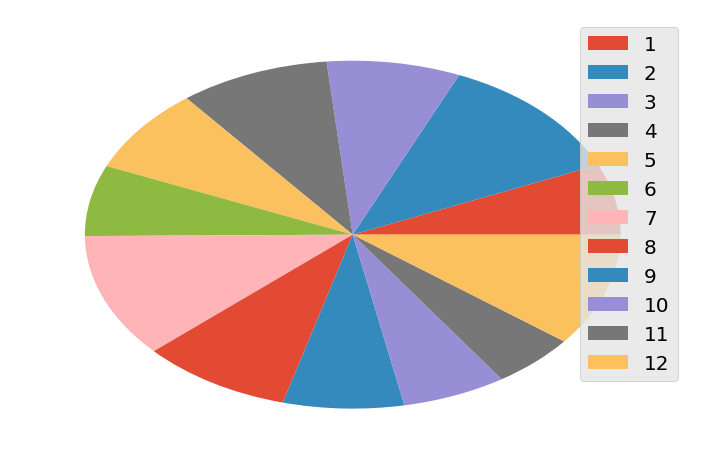

In [64]:

percentSales = [i/sum(year_1) for i in year_1]

patches, texts = plt.pie(percentSales)
plt.legend(patches, months)
plt.show()

## Choosing a visualization

Still not sure which visualization to use?

Use [this flow chart](http://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## Bad Visualizations

Bad visualizations are everywhere, you can easily find some by [googling](http://lmgtfy.com/?q=bad+data+visualizations).

Some examples:
- [viz.wtf](http://viz.wtf/)
- [Flowing Data - ugly visualizations](https://flowingdata.com/category/visualization/ugly-visualization/)
- [The 27 worst charts of all time](http://www.businessinsider.com/the-27-worst-charts-of-all-time-2013-6?op=1)


## Easily improve matplotlib plots

Using matplotlib stylesheets.

`plt.style.use()`

In [65]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [66]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

In [67]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [68]:
plt.style.use('bmh')

In [69]:
plt.style.use('fivethirtyeight')

In [70]:
plt.style.use('ggplot')

In [71]:
plt.style.use('default')

## Custom Styles

You can also write your own styles. Check out the [style api](http://matplotlib.org/api/style_api.html) and [reference examples](http://matplotlib.org/examples/style_sheets/style_sheets_reference.html).

In [72]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


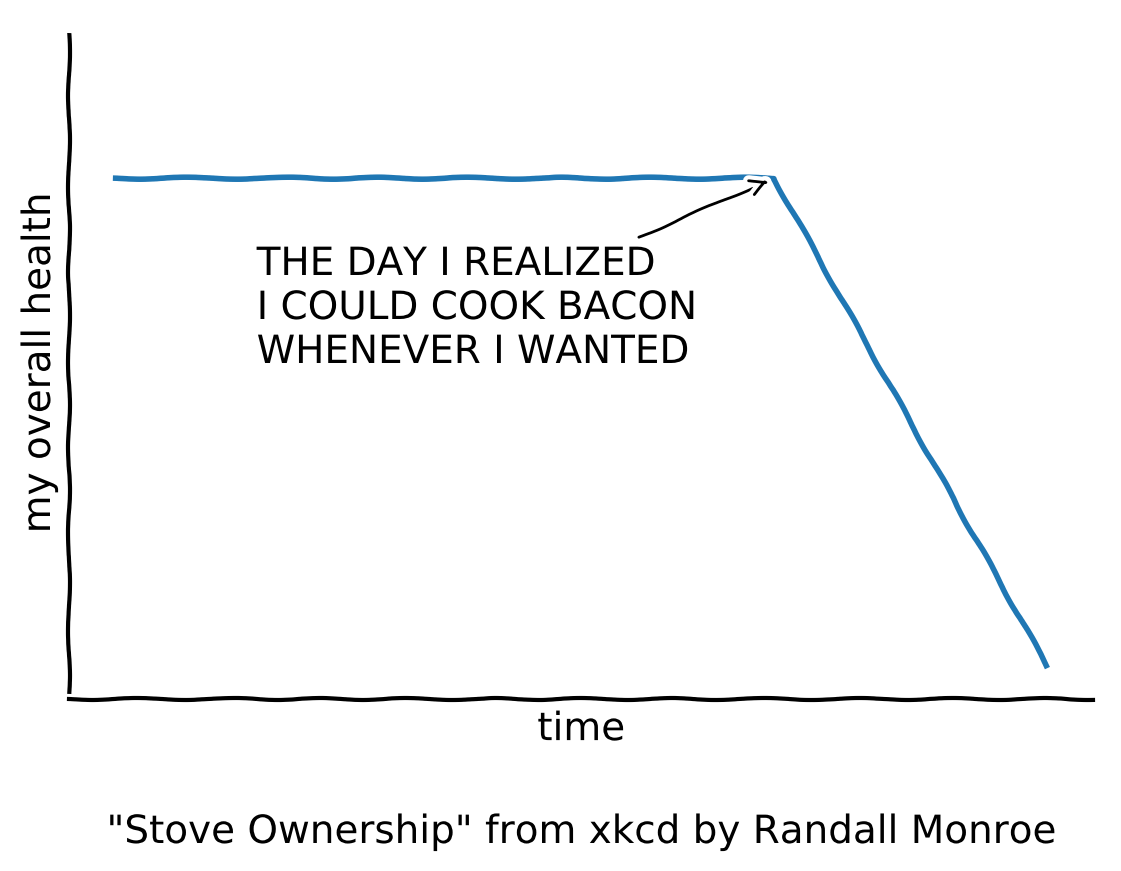

In [73]:
## xkcd style from http://matplotlib.org/examples/showcase/xkcd.html
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

plt.show()

In [74]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


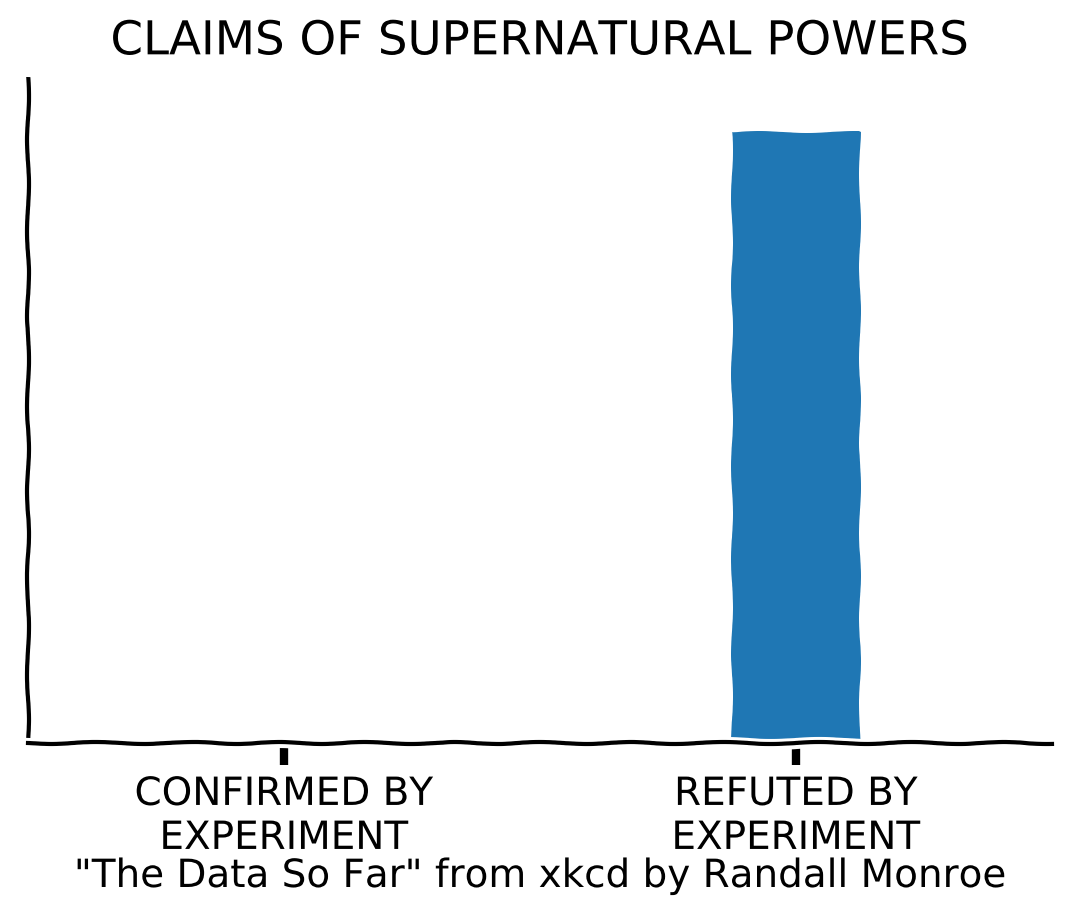

In [75]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')
    
plt.show()

## Telling a story

Shifting from **exploratory** analysis to **explanatory** analysis.



## Telling a story

You can tell a story using 1 visualization or multiple

* Create a (visual) outline or storyboard. 
* Make sure your story flows.

## Steps To Tell A Story

1. Establish context
1. Select appropriate visualization types
1. Remove clutter and add focus
1. Simplify the design
1. Make sure it flows

### Establish Context

Understand your audience and stakeholders.

Answer the following questions:

1. Who is the primary decision maker? Who is viewing your visualization/presentation?
1. What are you trying to understand? What is your recommendation/conclusion?
1. How are you proving your recommendation/conclusion? 

### Select Appropriate Visualizations

Make sure you are using the right visualization to express your views:

1. Relationship - scatter plot
1. Distribution - histogram
1. Comparison - bar chart
1. Over time - line chart

### Remove Clutter & Add Focus

Make sure the focus is on your data and story.

1. De-emphasize chart title
1. Remove or de-emphasize borders and gridlines
1. De-emphasize axes and labels

Emphasize the key points in your story. You can do this by changing the colors of certain datapoints or segments.

### Simplify The Design

Use simpler text in the titles and labels. Only capitalize the first letter so it's easier to read.

Align elements to improve the aesthetics. 

### Flow

Make sure there is a narrative being shared and that each part or visualization connects with the next.

## Three Takeaways

1. Emphasize the difference between exploratory and explanatory analyses
1. Use `plt.style.use('ggplot')`
1. Do not use pie charts

## Other Links

* [Sparkline theory](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0001OR)
* [Cycle Plots](https://www.perceptualedge.com/articles/guests/intro_to_cycle_plots.pdf)
* [Subtleties of Color](http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/)
* [Chartjunk](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00040Z)
* [Line Graphs](http://www.perceptualedge.com/articles/visual_business_intelligence/line_graphs_and_irregular_intervals.pdf)
* [Rules for Encoding Values on a Graph](https://www.perceptualedge.com/articles/b-eye/encoding_values_in_graph.pdf)

## References

* [Storytelling with Data](http://www.storytellingwithdata.com/book/)
* [Data Visualization](https://www.amazon.com/Data-Visualisation-Handbook-Driven-Design-ebook/dp/B01G2C5VCG/ref=mt_kindle?_encoding=UTF8&me=)
* [The truthful art](http://www.thefunctionalart.com/p/the-truthful-art-book.html)
* [Data Visualization in Tableau](https://www.udacity.com/course/data-visualization-in-tableau--ud1006)

# Extras

## Interactivity

Interactivity should be applied differently when exploring data from when presenting it.

When exploring data:

* The purpose of interactivity may be to show different perspectives or dig in to the details of the data.

When presenting data:

* The purpose of interactivity should be to show a different perspective not to explain or show details about what's already in front of your audience. 
* Ideally you can display a series of visualizations which show how you would interact with the visualization.

## Interactivity

You can add interactivity to a Jupyter notebook in a couple ways. 

1. basic interactivity while continuing to use matplotlib by using `%matplotlib notebook` instead of `%matplotlib inline`
1. added functionality using `mpld3`

### Examples of mpld3

[Linked Brush](http://mpld3.github.io/examples/linked_brush.html) - highlight the same section across multiple plots in a scatter matrix.

[Custom Plugin](http://mpld3.github.io/examples/custom_plugin.html) - use one visualization to select the elements to plot in another visualization.

[Random Walk](http://mpld3.github.io/examples/random_walk.html) - highlight a specific line on a line chart when hovered over.

These are all useful for exploration but on their own do not necessarily tell a story.

## Tableau

[Tableau Public](https://public.tableau.com/s/) is a simple tool that allows you to "visualize and share data in minutes - for free". 

The catch:

1. Everything you work on will be public on your Tableau profile.
1. Can't save files locally

Workarounds:

1. Pay for Tableau Desktop (\$999 or \$1,999) or Tableau Online (\$500/user/year)
1. Save to Tableau Public then download a copy

You could theoretically, save to Tableau Public, download a copy and then delete from Tableau Public to ensure your work isn't public. Not necessarily worth the effort since you likely want to share what you're working on anyway.

[Examples from Tableau's Gallery](https://public.tableau.com/en-us/s/gallery)

### Tutorials on how to use Tableau

1. [Udacity course](https://www.udacity.com/course/data-visualization-in-tableau--ud1006) - videos
1. [Tableau Tutorials](https://www.tableau.com/learn/training) - videos
1. [Tutorials Point](https://www.tutorialspoint.com/tableau/) - text


## Tools

Sometimes it may be difficult to figure out which tool to use. You may be able to plot anything with matplotlib but that doesn't necessarily mean it's the best for the job.

Depending on what you're trying to do, you should select the best tool for that. Here is a great [article comparing 24 different tools to help you decide](https://source.opennews.org/articles/what-i-learned-recreating-one-chart-using-24-tools/).